In [1]:
import SigVarGen as svg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

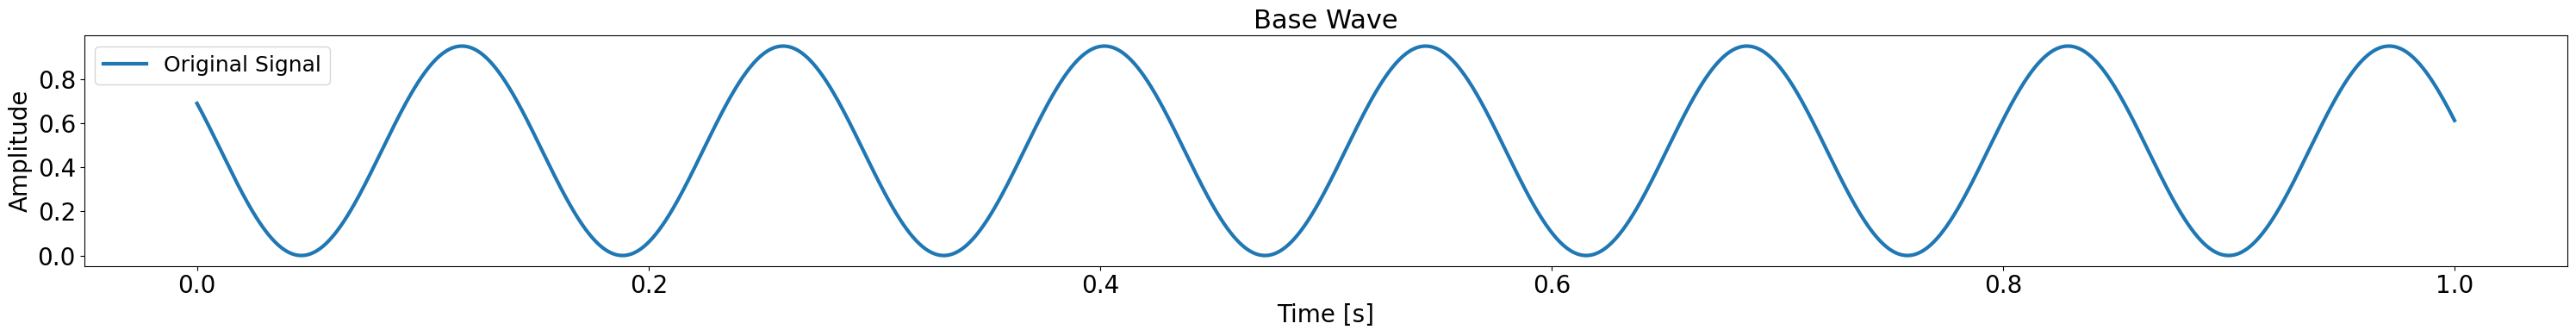

In [3]:
fs = max(svg.EMBEDDED_DEVICE_RANGES['Arduino Board']['frequency'])*2  # sampling rate in Hz
duration = 1  # seconds
n_samples = int(fs * duration)
t = np.linspace(0, duration, n_samples, endpoint=False)

wave, _ = svg.generate_signal(t=t, n_sinusoids=1, amplitude_range=(0,1), frequency_range=(5,10))

plt.figure(figsize=(30, 4))
plt.plot(t, wave, label="Original Signal", linewidth=3)
plt.title(f"Base Wave", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

### Different Noise Colors with reducing noise power

Selected SNR (dB): 0.00   Noise Power: 1.1215e-01


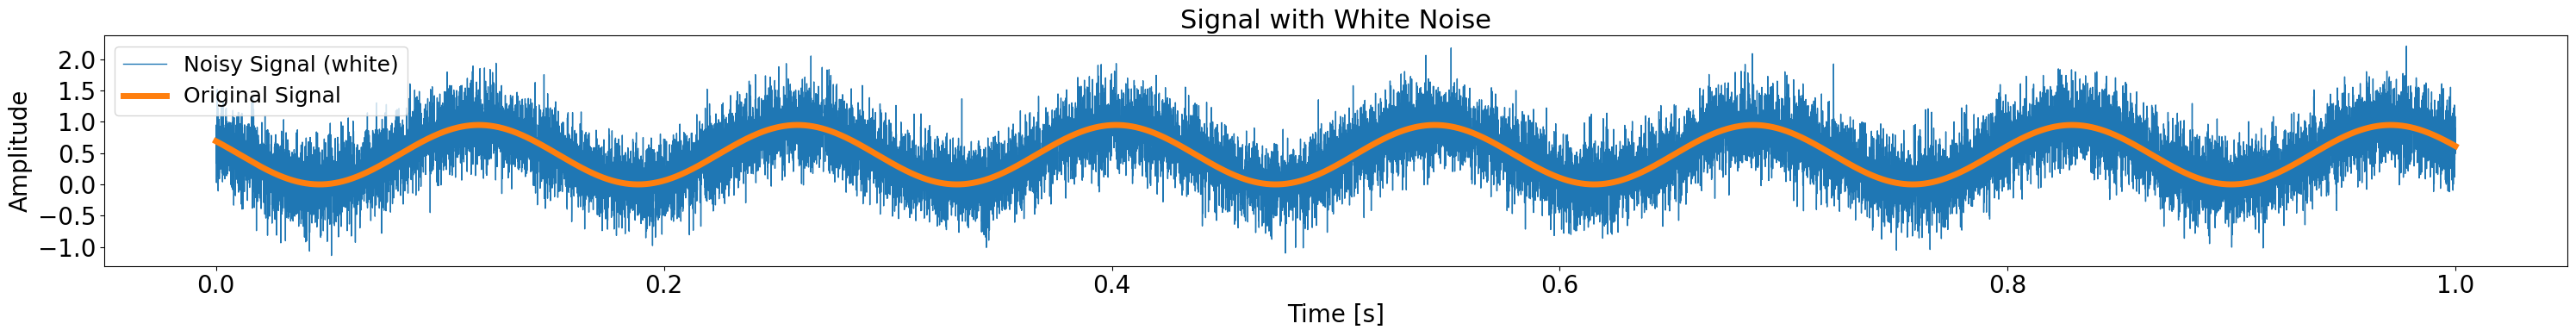

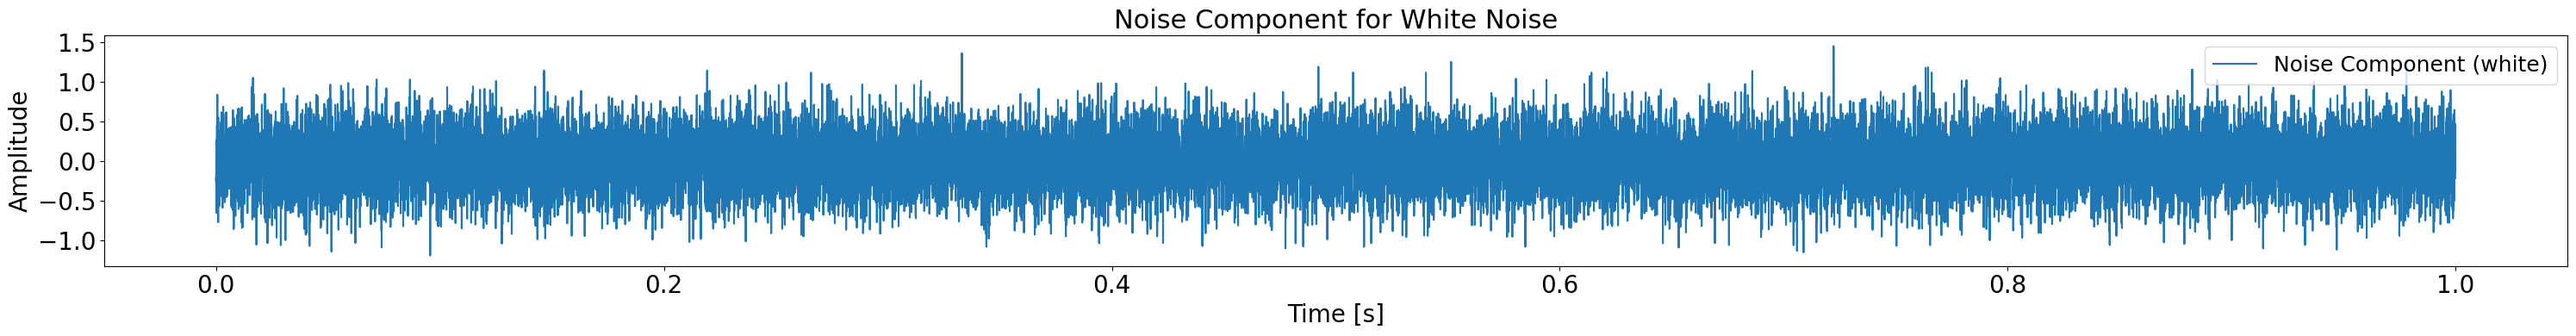

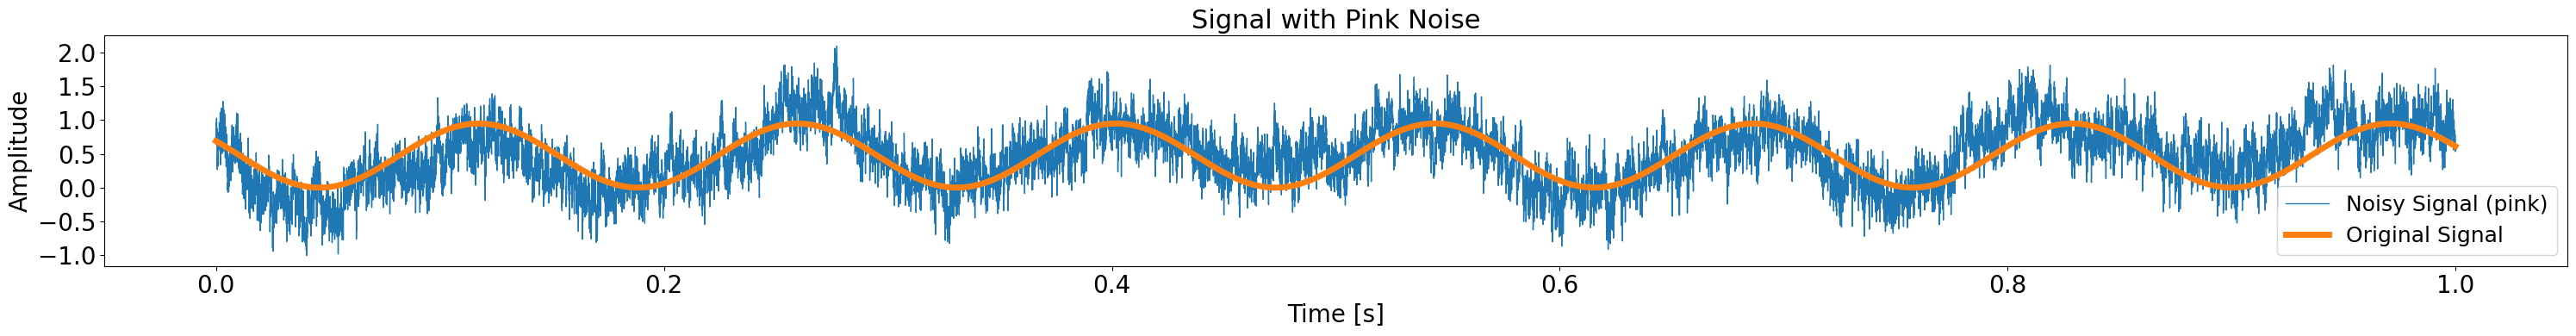

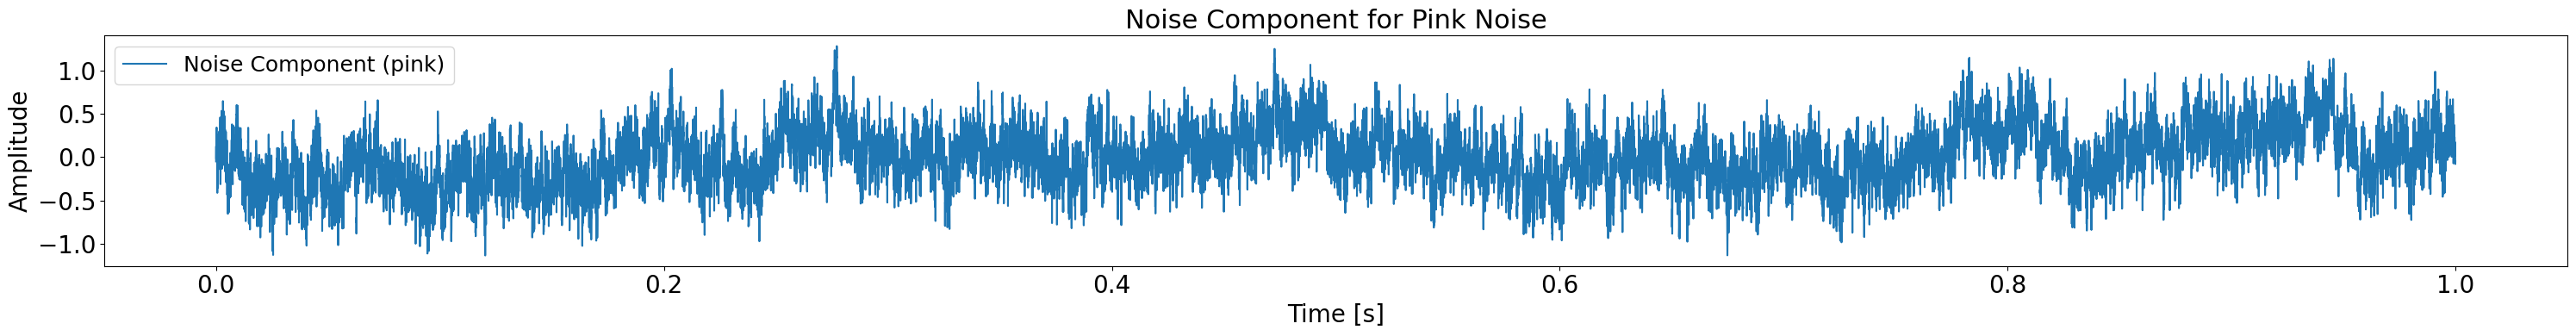

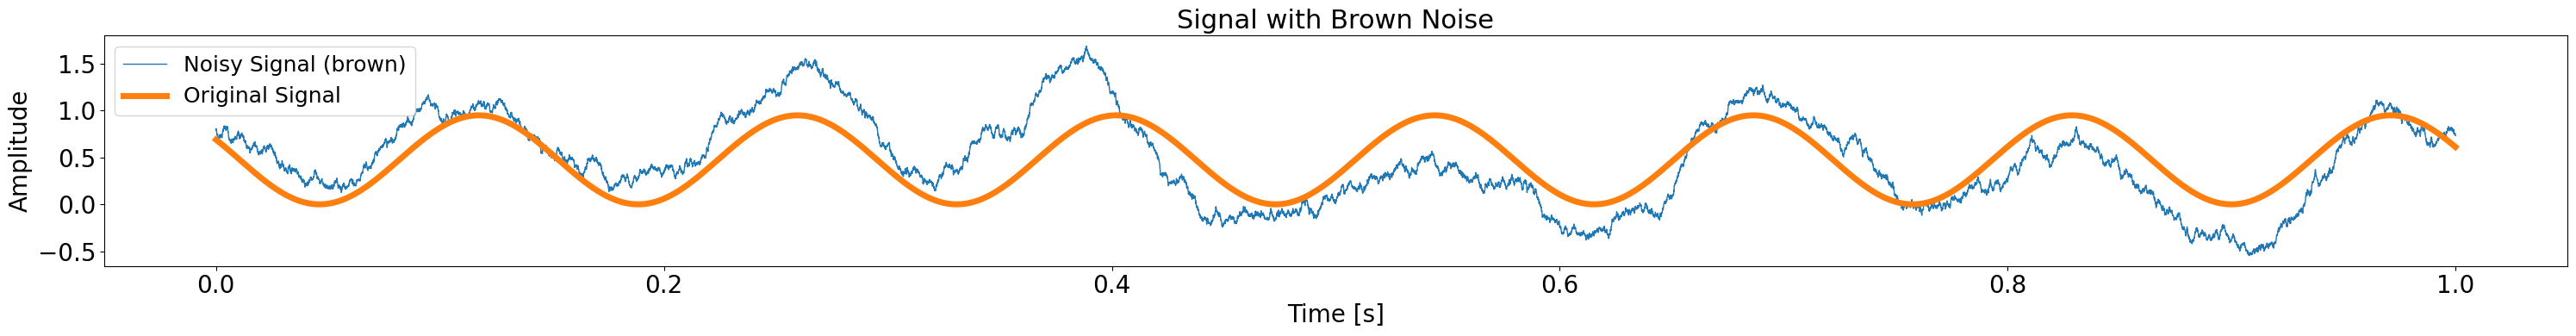

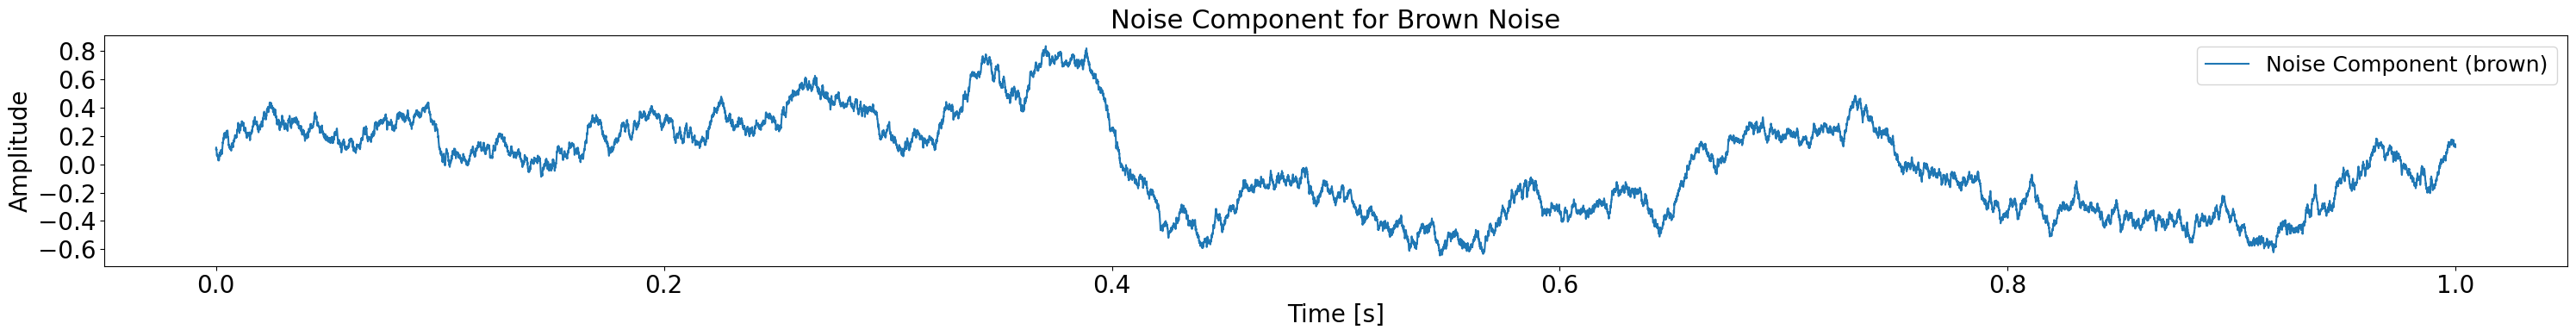

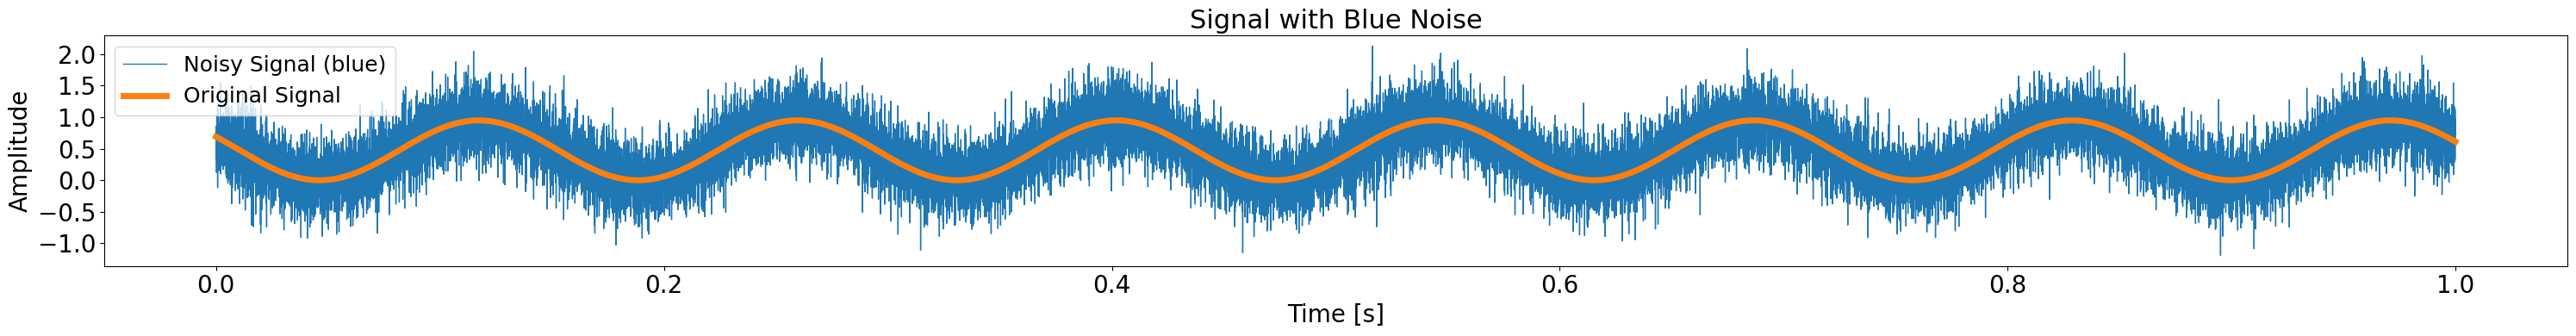

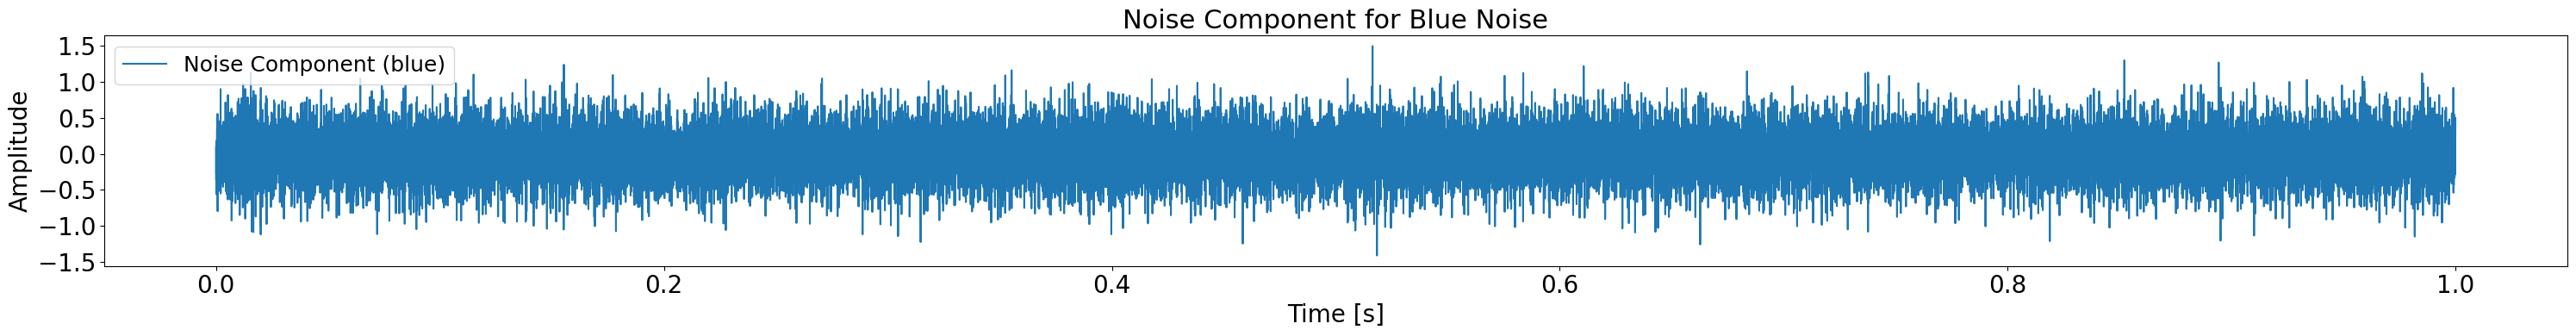

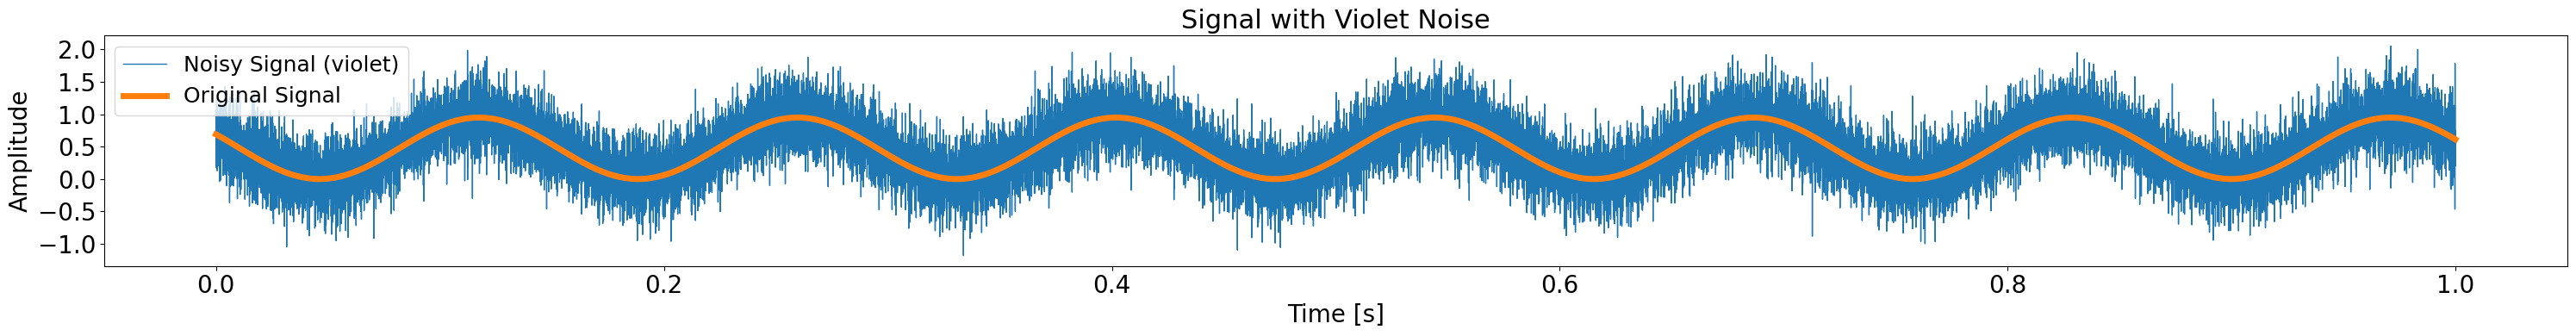

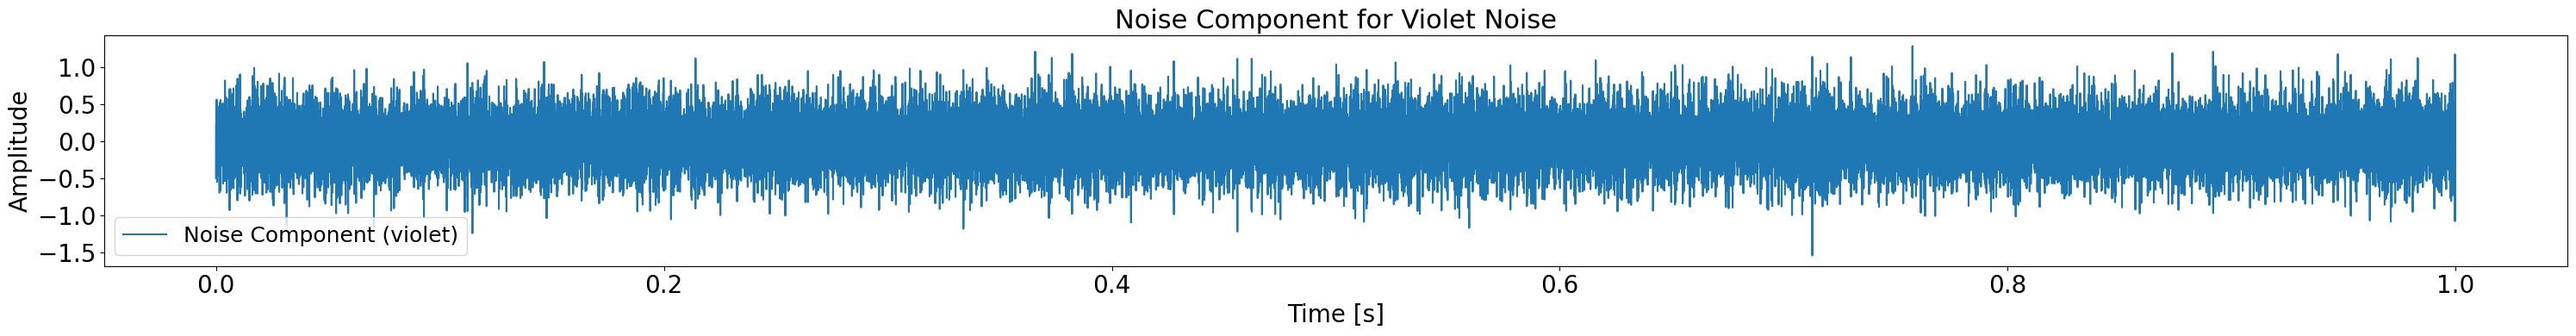

Selected SNR (dB): 10.00   Noise Power: 1.1215e-02


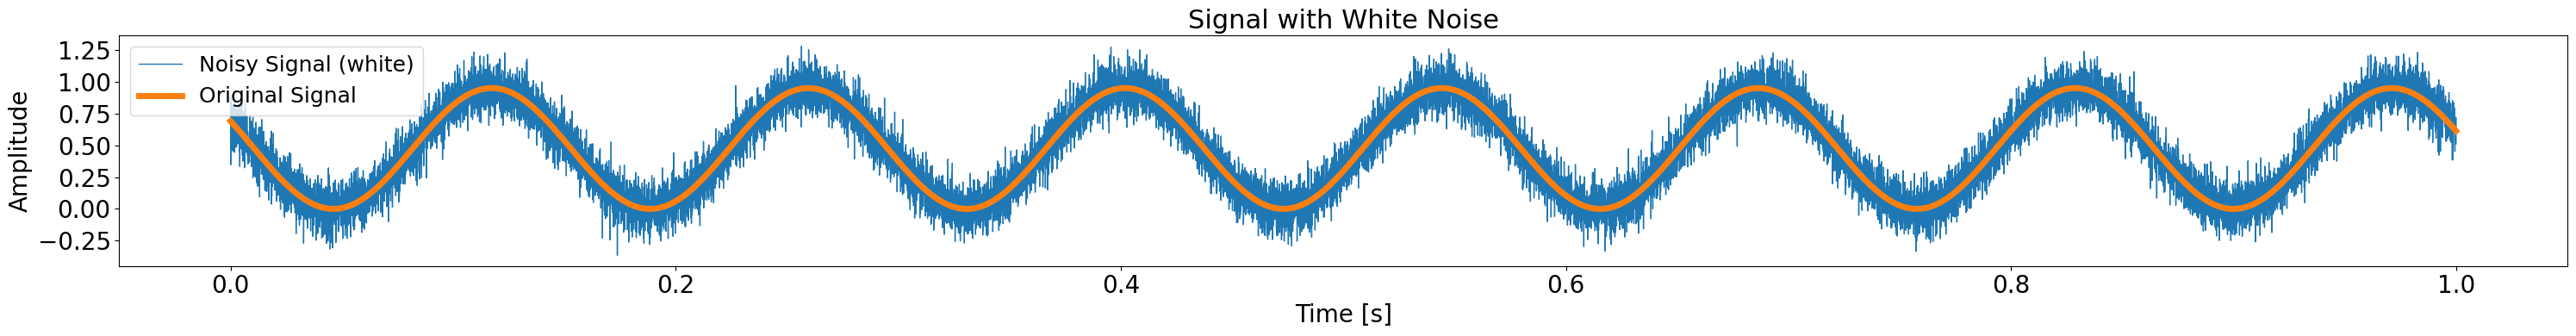

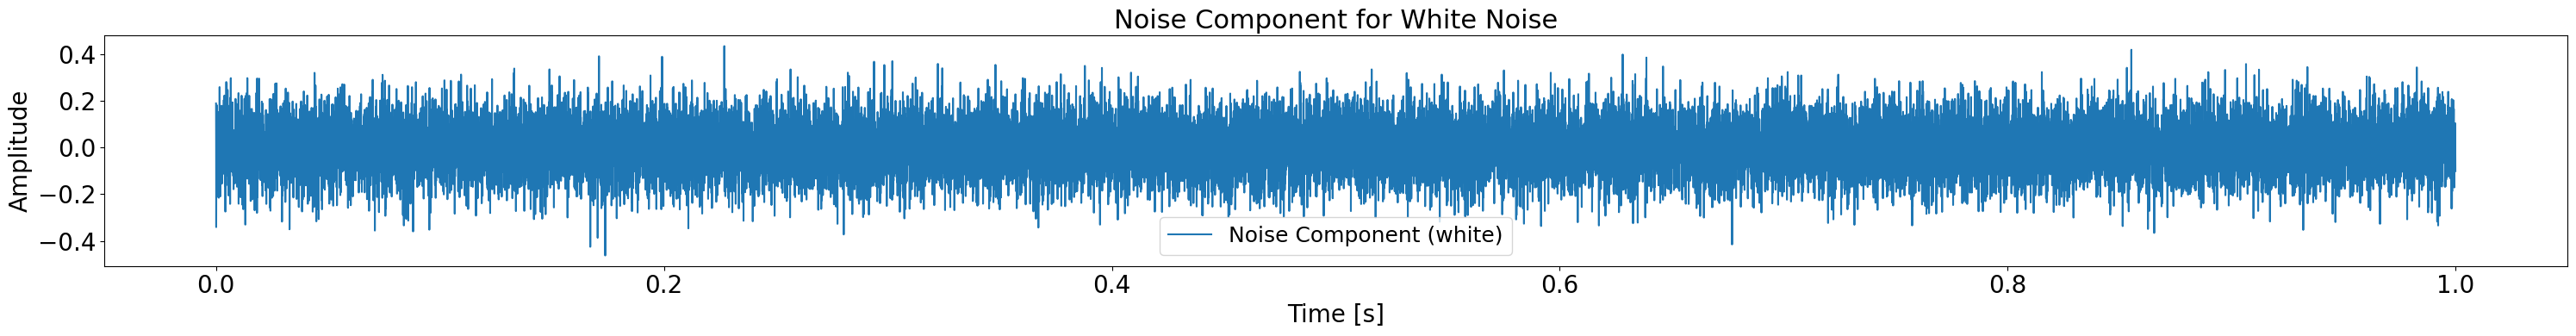

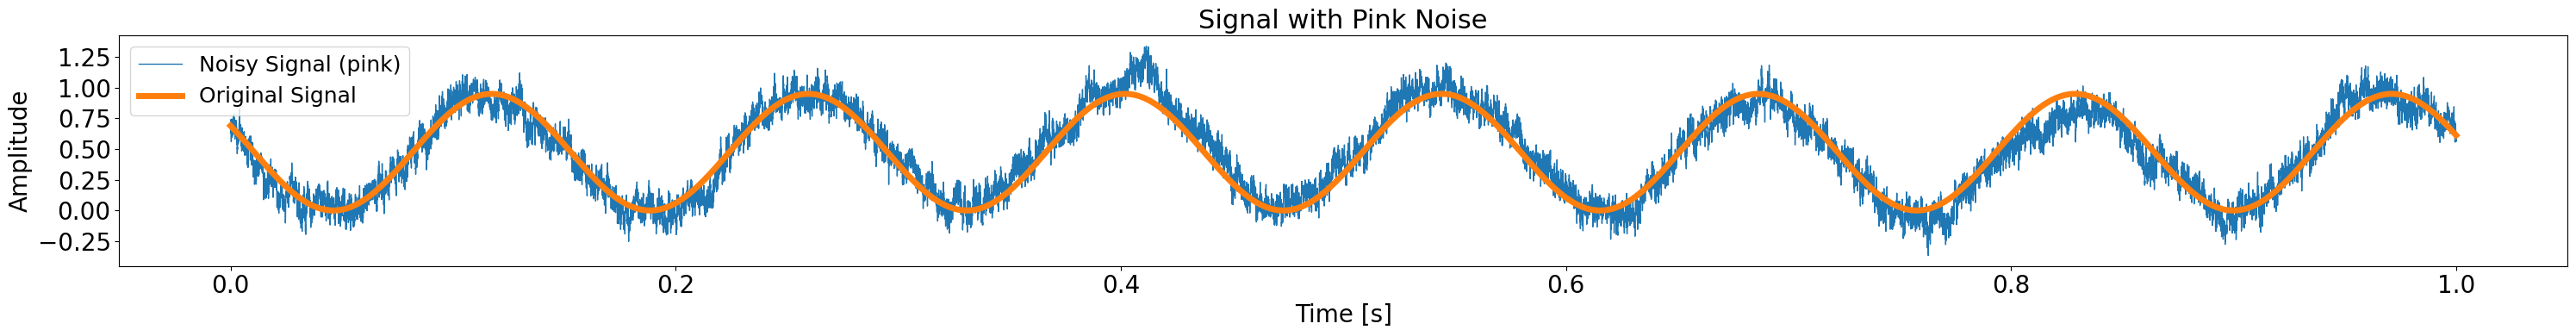

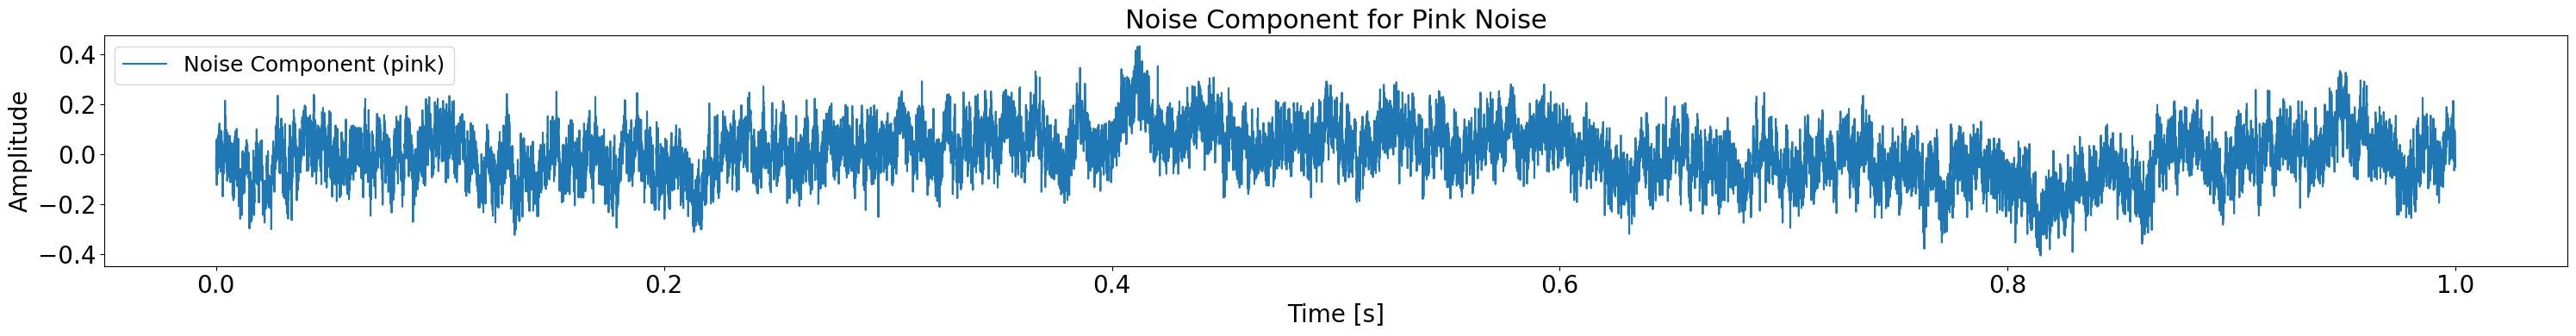

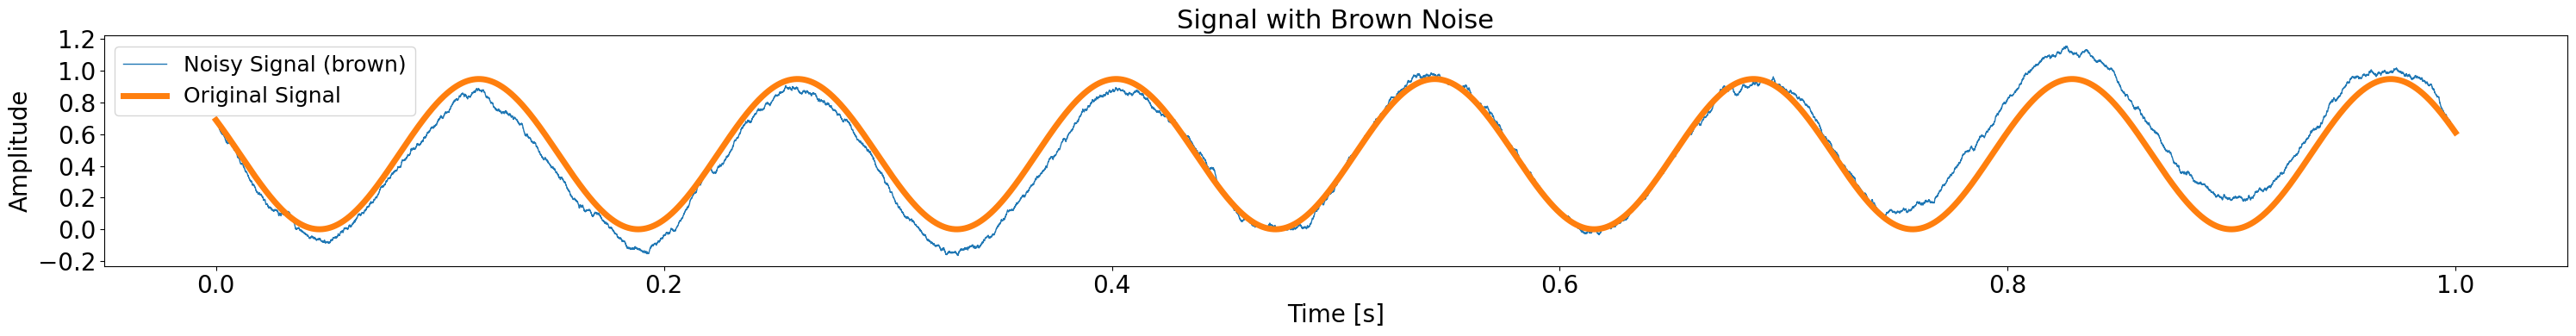

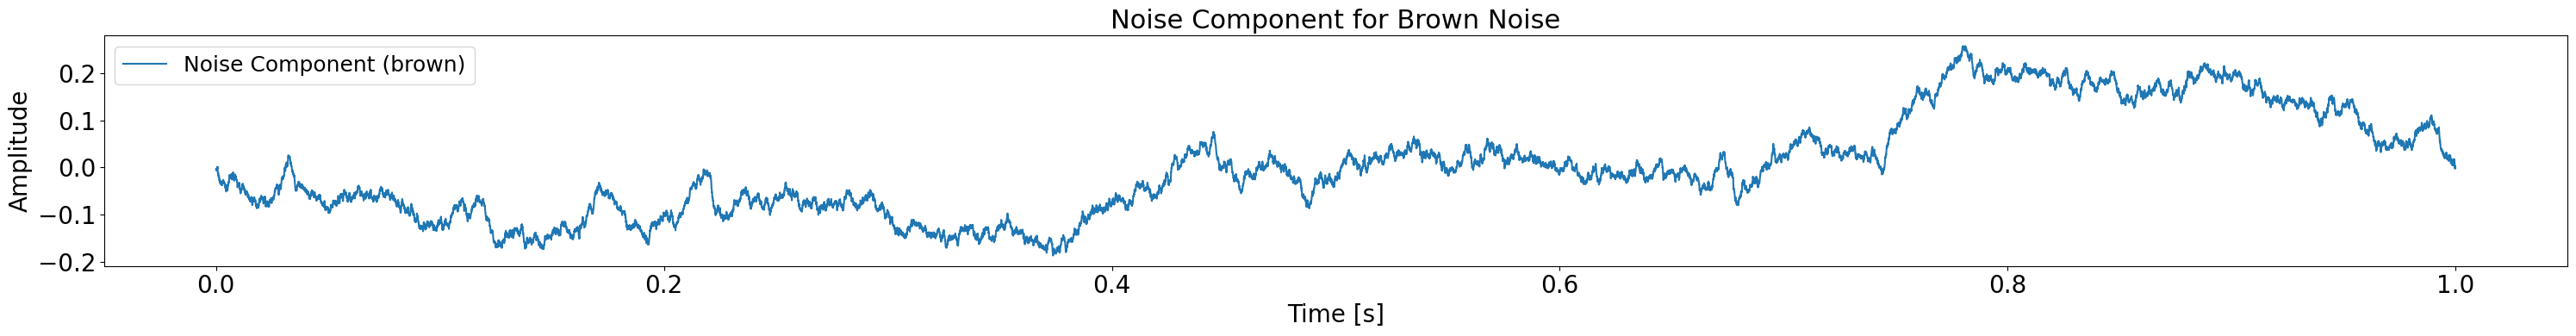

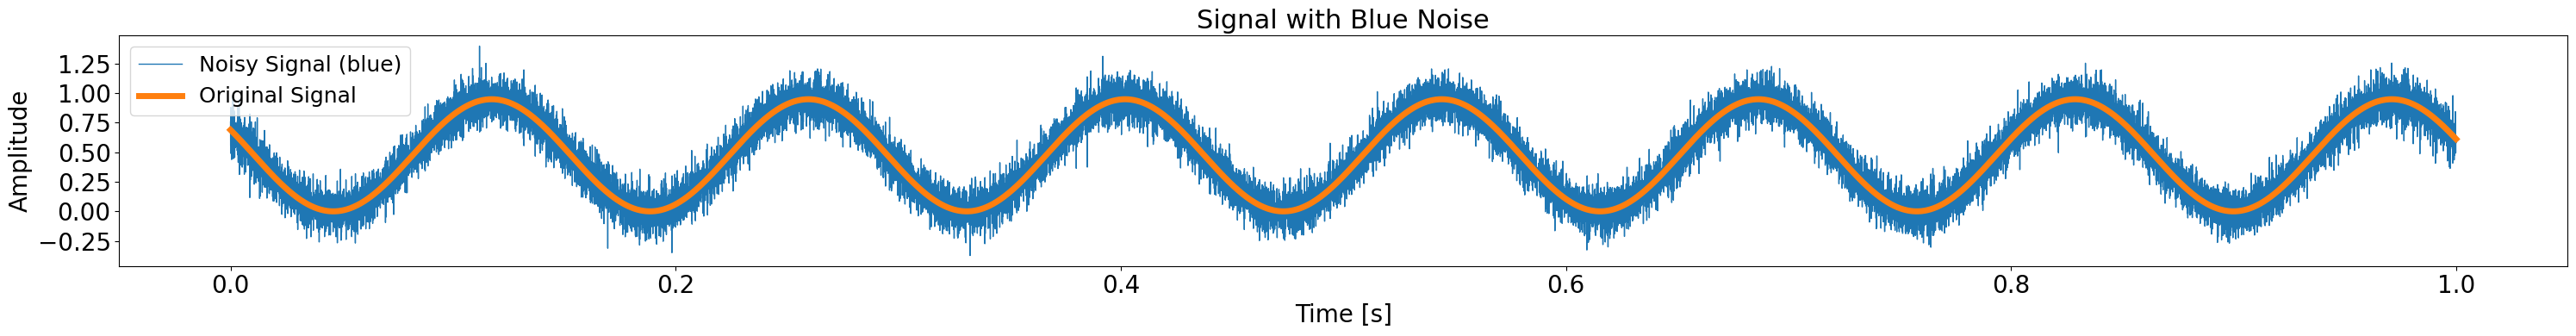

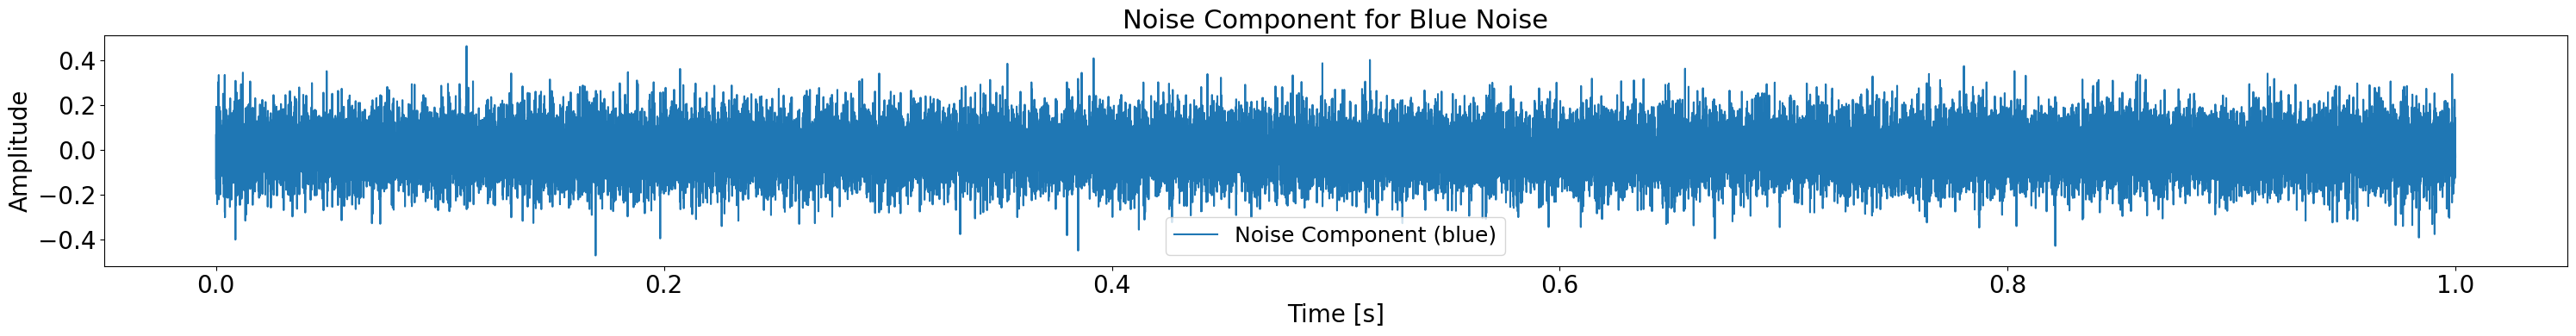

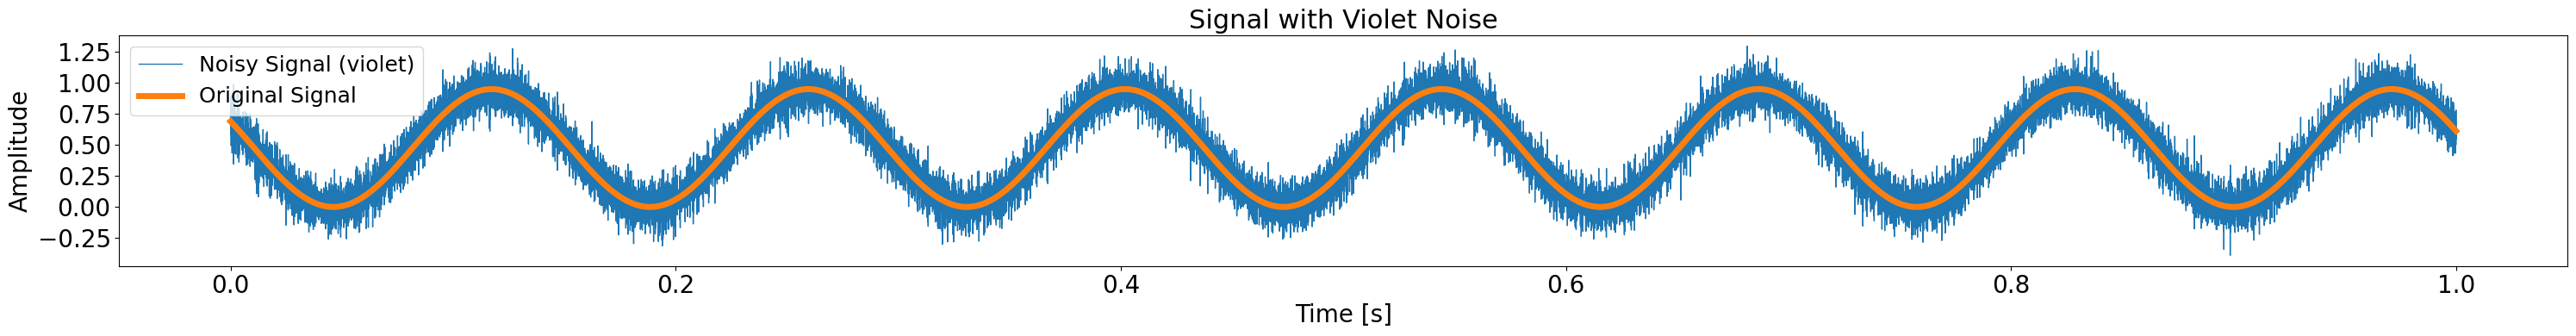

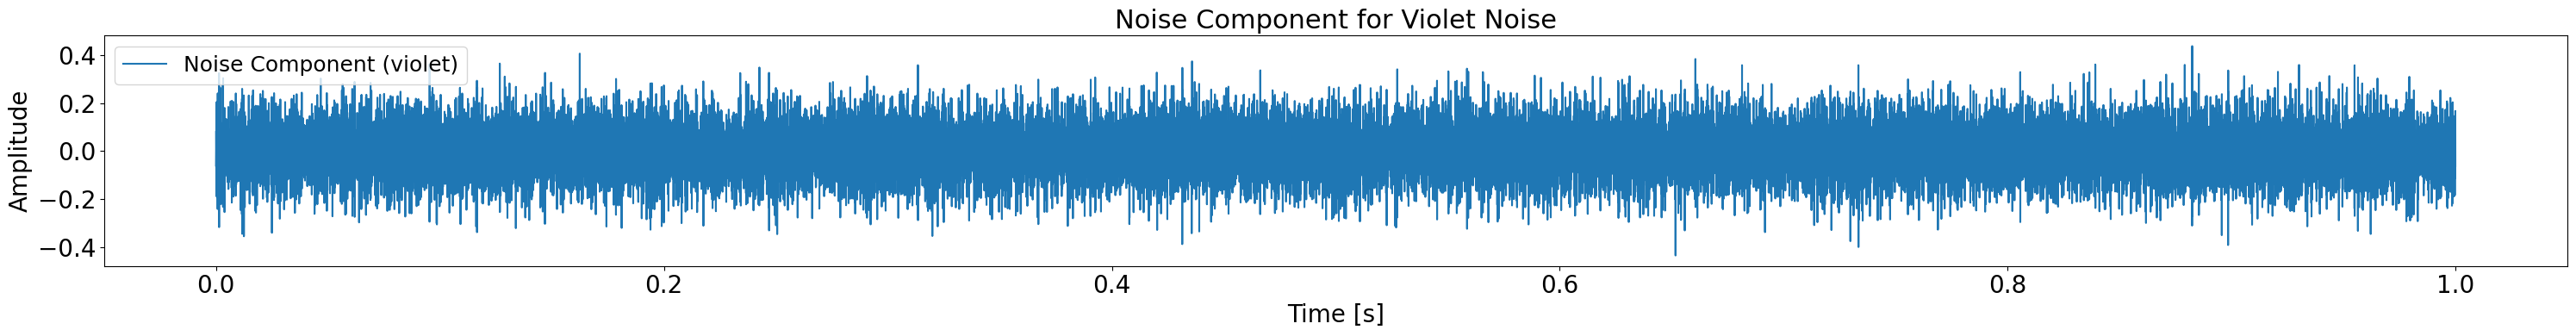

In [4]:
snr_ranges = [(0, 0), (10, 10)]

for snr_range in snr_ranges:
    # Compute noise power based on the test signal
    noise_power, selected_snr_db = svg.generate_noise_power(wave, snr_range=snr_range)
    print(f"Selected SNR (dB): {selected_snr_db:.2f}   Noise Power: {noise_power:.4e}")

    noise_types = ['white', 'pink', 'brown', 'blue', 'violet']

    for color in noise_types:
        # Use fixed modulation factors (1,1) and npw (1,1) for simplicity
        noisy_wave, noise_component = svg.add_colored_noise(
            wave, fs, noise_power, npw=(1, 1), mf=(1, 1), color=color, mod_envelope=None
        )
        
        # Plot original vs. noisy signal
        plt.figure(figsize=(30, 4))
        plt.plot(t, noisy_wave, label=f"Noisy Signal ({color})", linewidth=1)
        plt.plot(t, wave, label="Original Signal", linewidth=5)
        plt.title(f"Signal with {color.capitalize()} Noise", fontsize=22)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel("Time [s]", fontsize=20)
        plt.ylabel("Amplitude", fontsize=20)
        plt.legend(fontsize=18)
        plt.tight_layout()
        plt.show()
        
        # Plot the noise component alone
        plt.figure(figsize=(30, 4))
        plt.plot(t, noise_component, label=f"Noise Component ({color})")
        plt.title(f"Noise Component for {color.capitalize()} Noise", fontsize=22)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.xlabel("Time [s]", fontsize=20)
        plt.ylabel("Amplitude", fontsize=20)
        plt.legend(fontsize=18)
        plt.tight_layout()
        plt.show()

In [5]:
from scipy.signal import welch

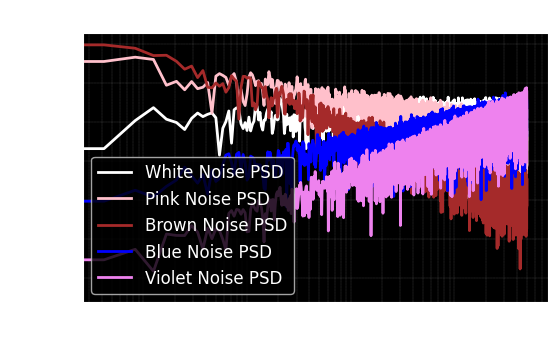

In [6]:
# Compute and plot PSD for each noise type
noise_types = ['white', 'pink', 'brown', 'blue', 'violet']
plt.figure(figsize=(6, 3.5))
plt.style.use("dark_background")
for color in noise_types:
    noisy_wave, noise_component = svg.add_colored_noise(
            wave, fs, noise_power, npw=(1, 1), mf=(1, 1), color=color, mod_envelope=None)
    f, Pxx = welch(noise_component, nperseg=fs)  # Welch’s method for PSD
    #print(color, Pxx)
    plt.loglog(f, Pxx, label=f"{color.capitalize()} Noise PSD", linewidth=2, color=color)

plt.title(f"Power Spectral Density of Generated Noise", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Frequency [Hz]", fontsize=12)
plt.ylabel("Power Spectral Density", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.1)
plt.legend(fontsize=12)
plt.show()

### Noise Modulation Envelopes with White Noise

In [7]:
plt.style.use("default")

In [8]:
# Modulation envelope options with suggested param range defined as svg.noise_funcs

# For tutorial purposes we will define new dict with chosen params from those ranges
mod_envelopes = {
    'Linear True': {'func': svg.envelope_linear, 'param': [True, True]},
    'Linear False': {'func': svg.envelope_linear, 'param': [False, False]},
    'Sine 0.001': {'func': svg.envelope_sine, 'param': [0.001, 0.001]},
    'Sine 0.005': {'func': svg.envelope_sine, 'param': [0.005, 0.005]},
    'Sine 0.01': {'func': svg.envelope_sine, 'param': [0.01, 0.01]},
    'Random Walk 0.01': {'func': svg.envelope_random_walk, 'param': [0.01, 0.01]},
    'Random Walk 0.07': {'func': svg.envelope_random_walk, 'param': [0.07, 0.07]},
    'Random Walk 0.15': {'func': svg.envelope_random_walk, 'param': [0.15, 0.15]},
    'Blockwise 50': {'func': svg.envelope_blockwise, 'param': [50, 50]},
    'Blockwise 100': {'func': svg.envelope_blockwise, 'param': [100, 100]},
    'Blockwise 500': {'func': svg.envelope_blockwise, 'param': [500, 500]}
}

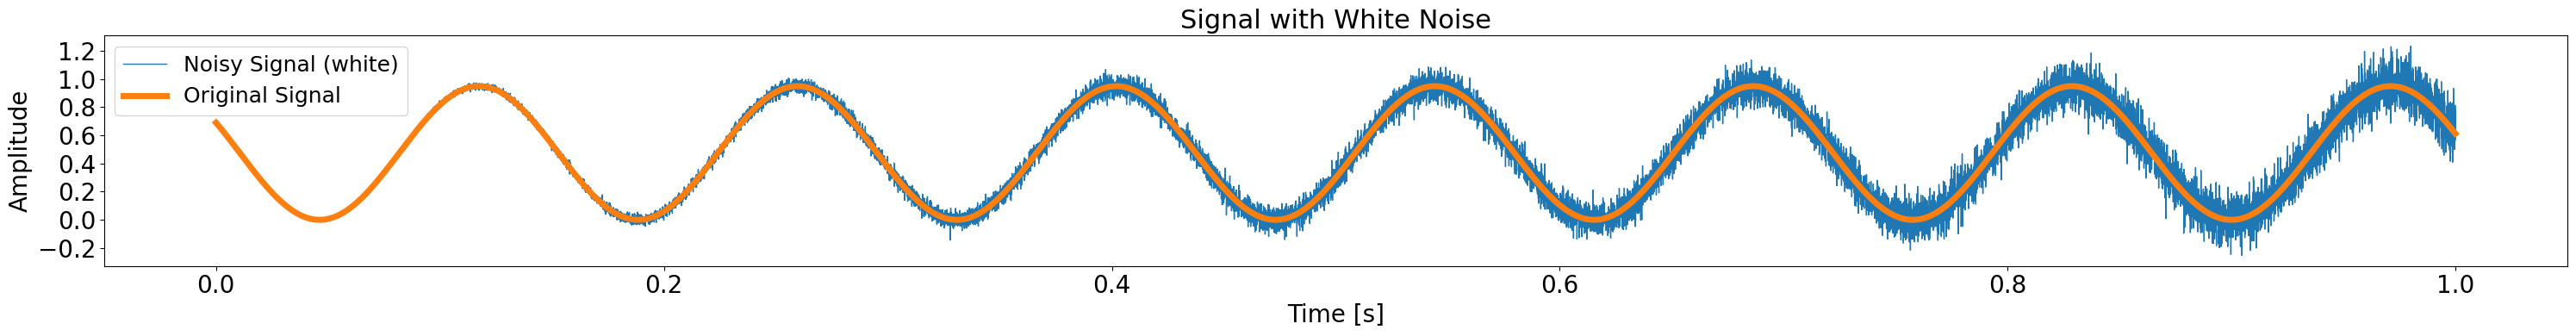

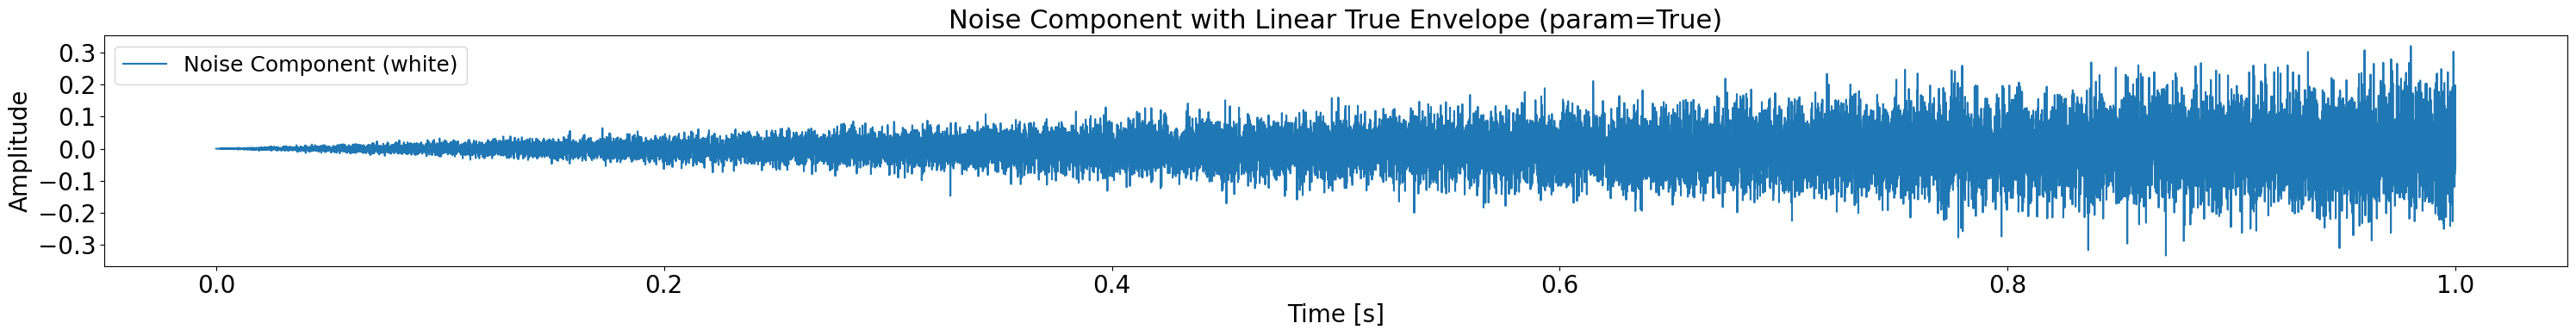

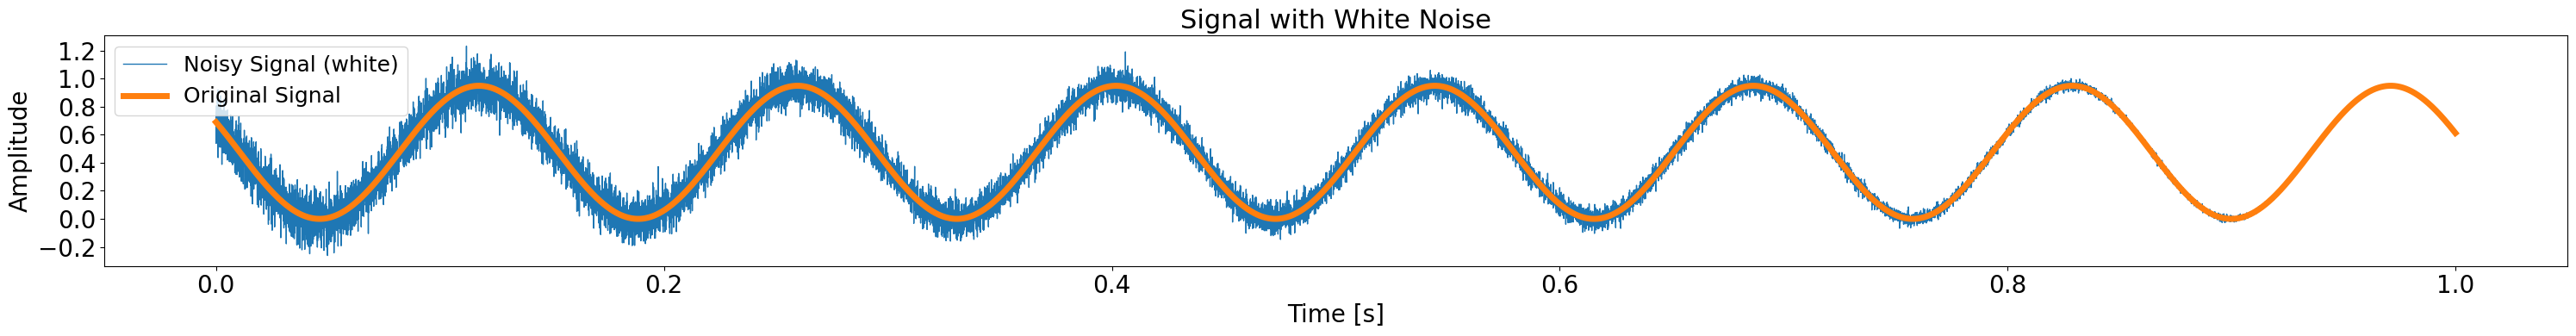

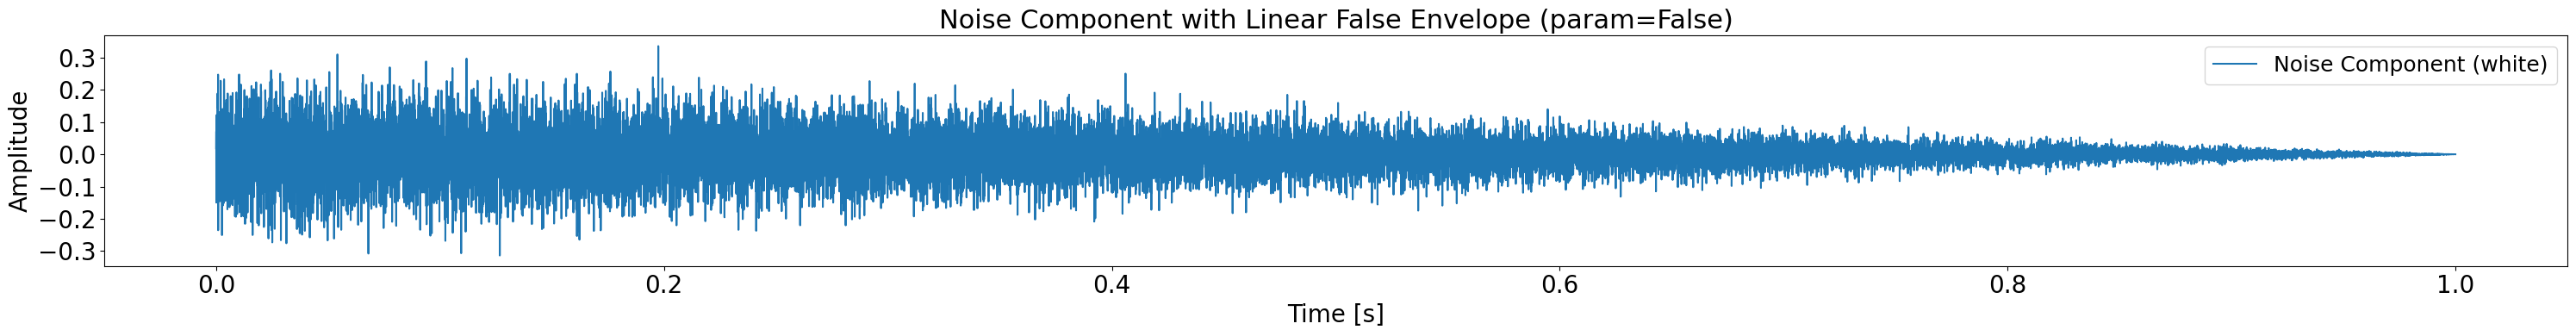

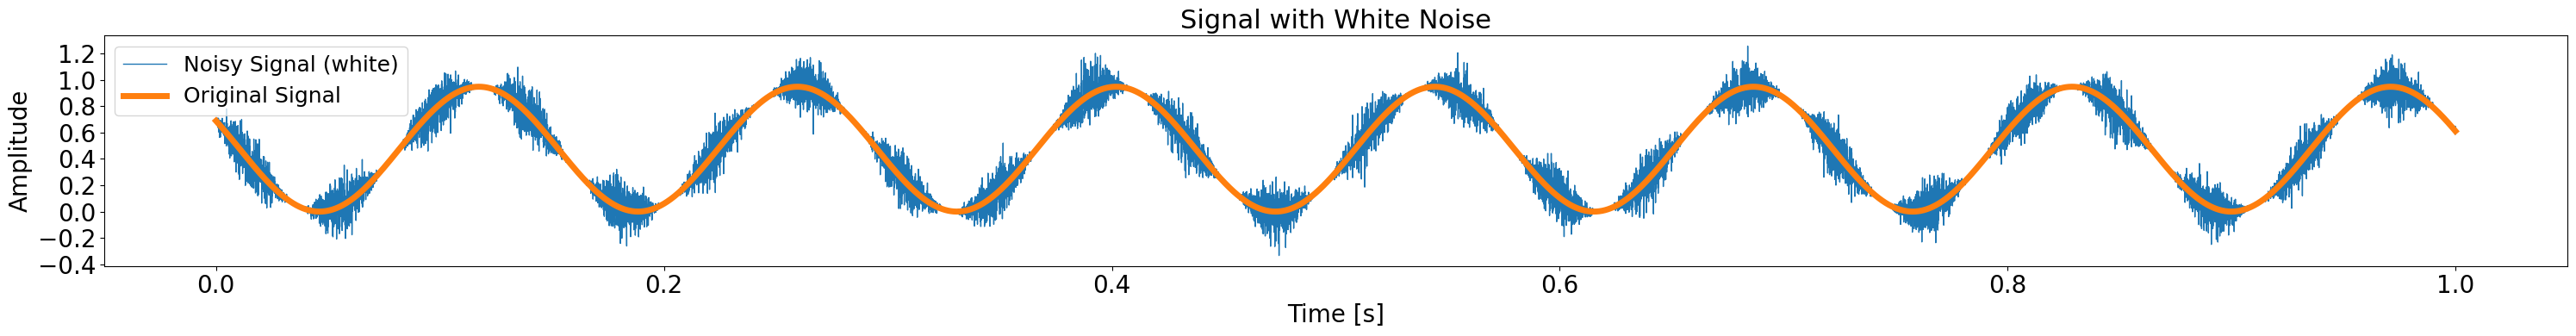

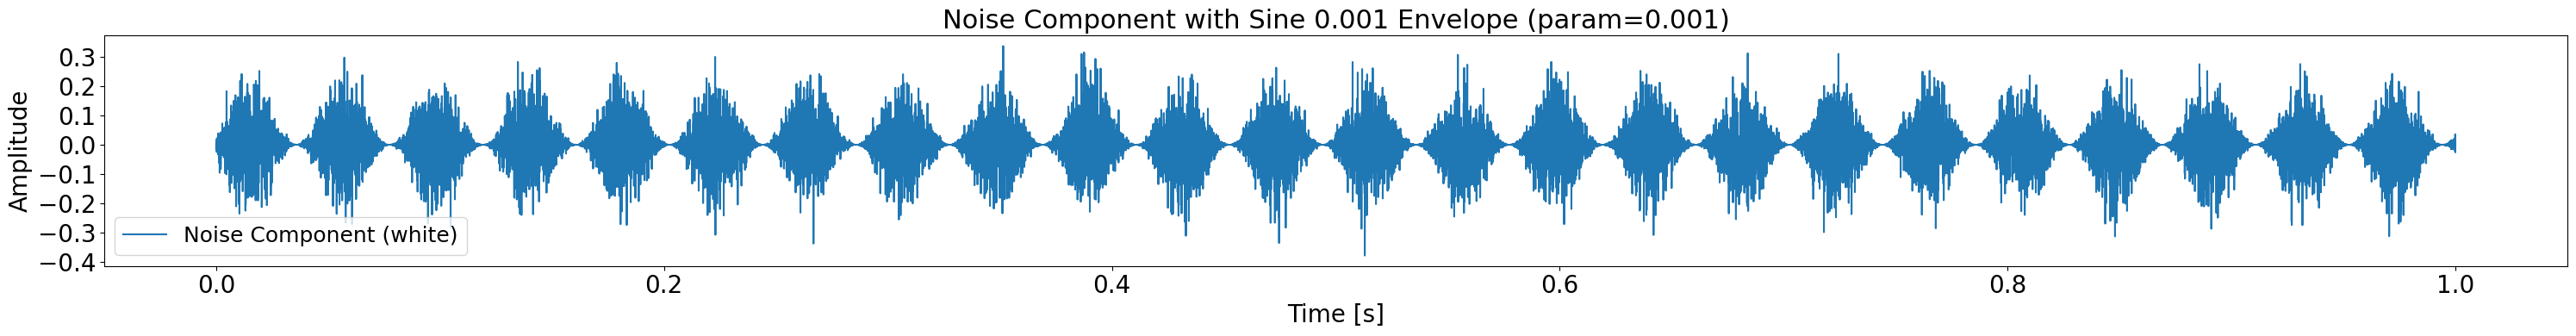

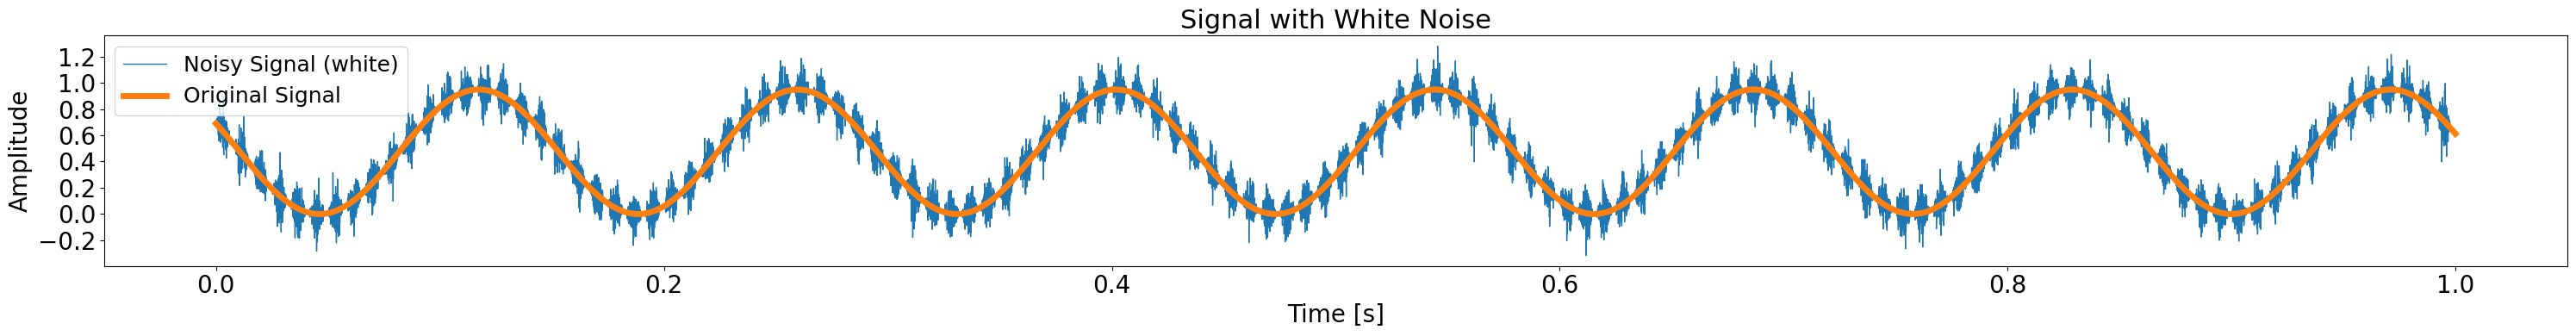

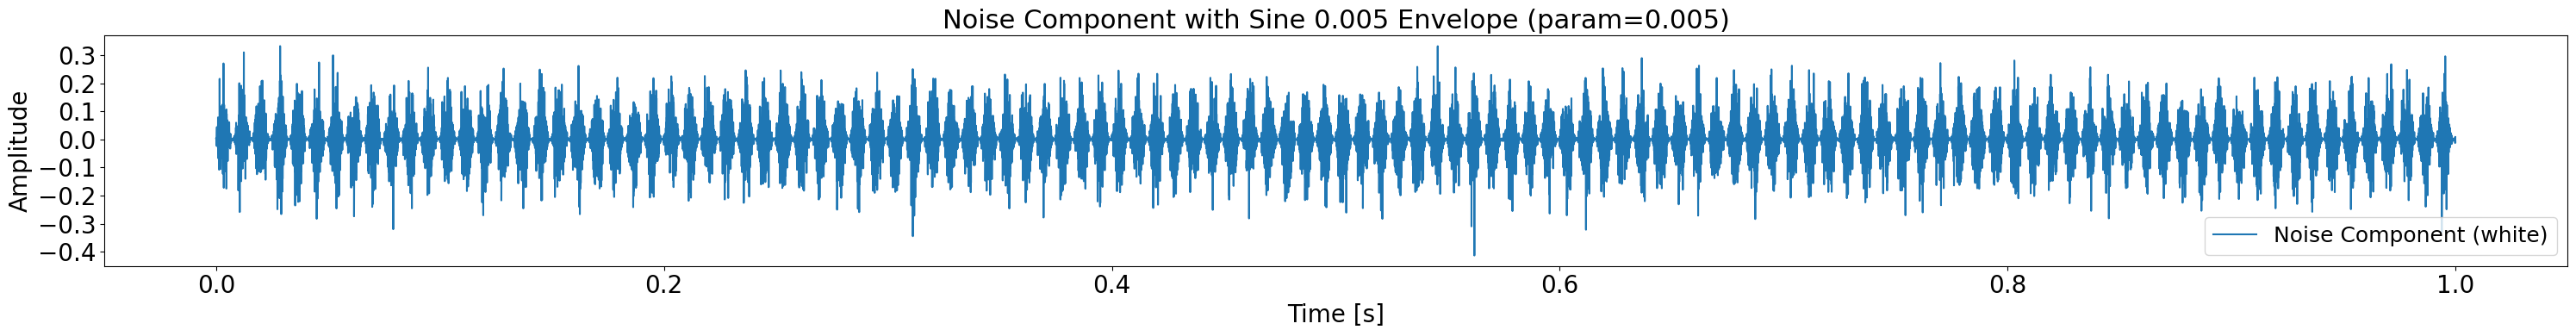

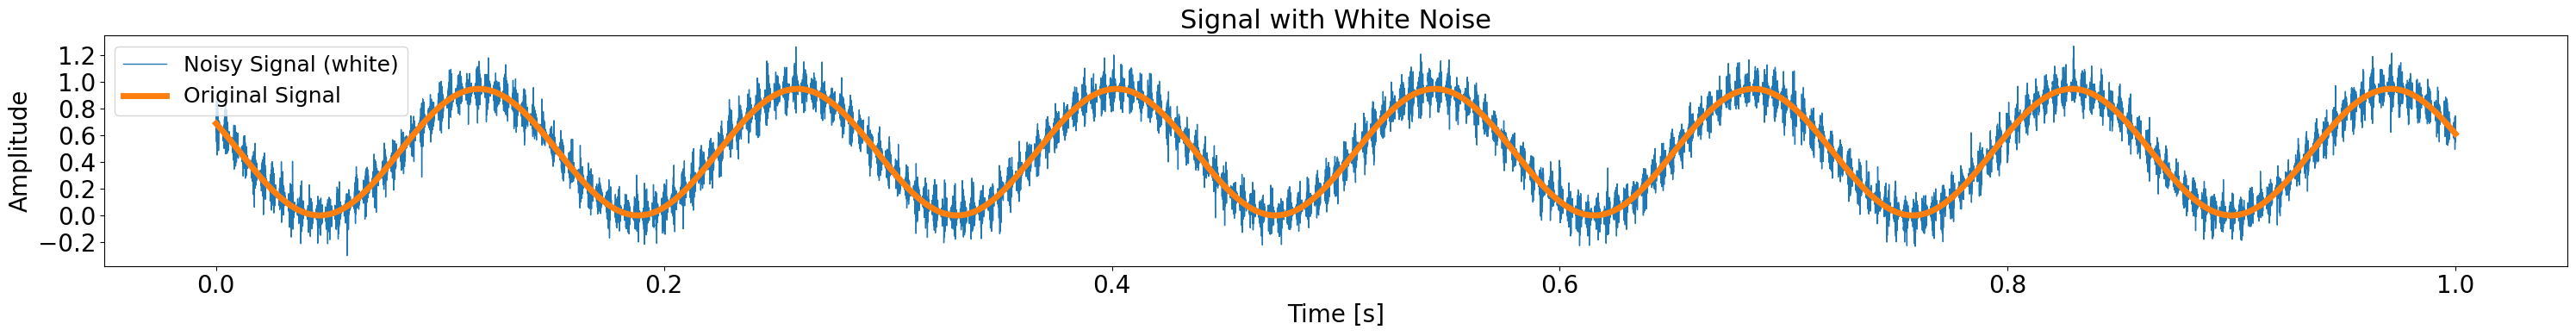

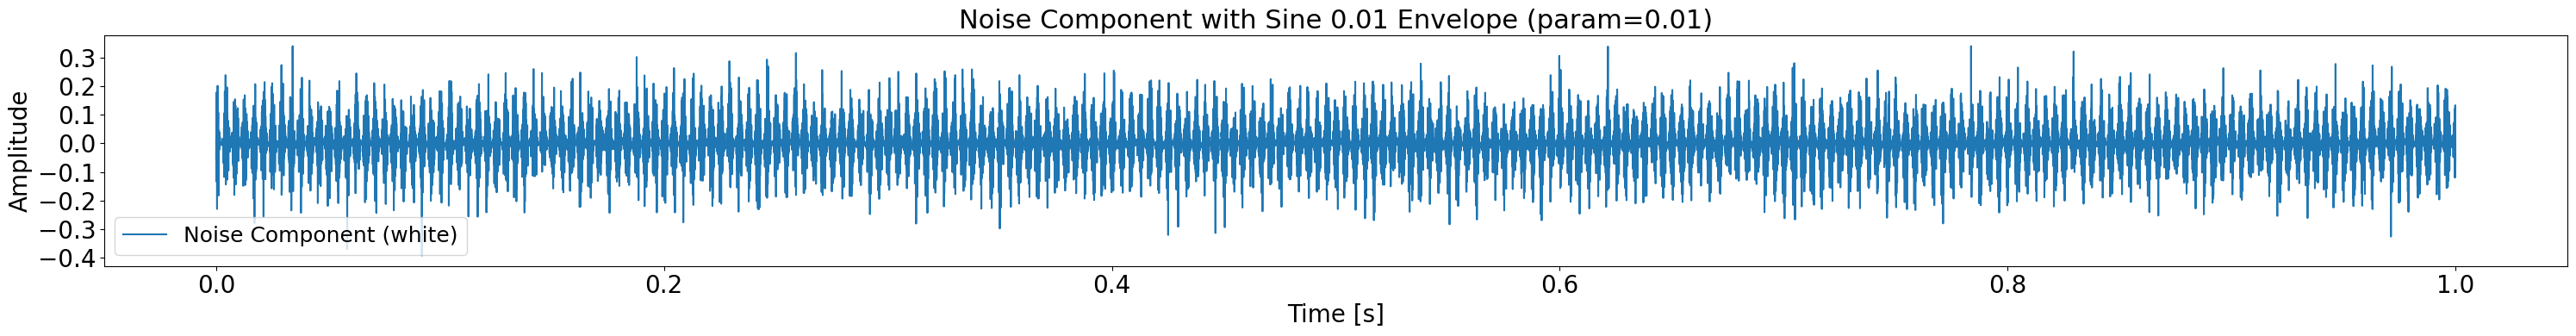

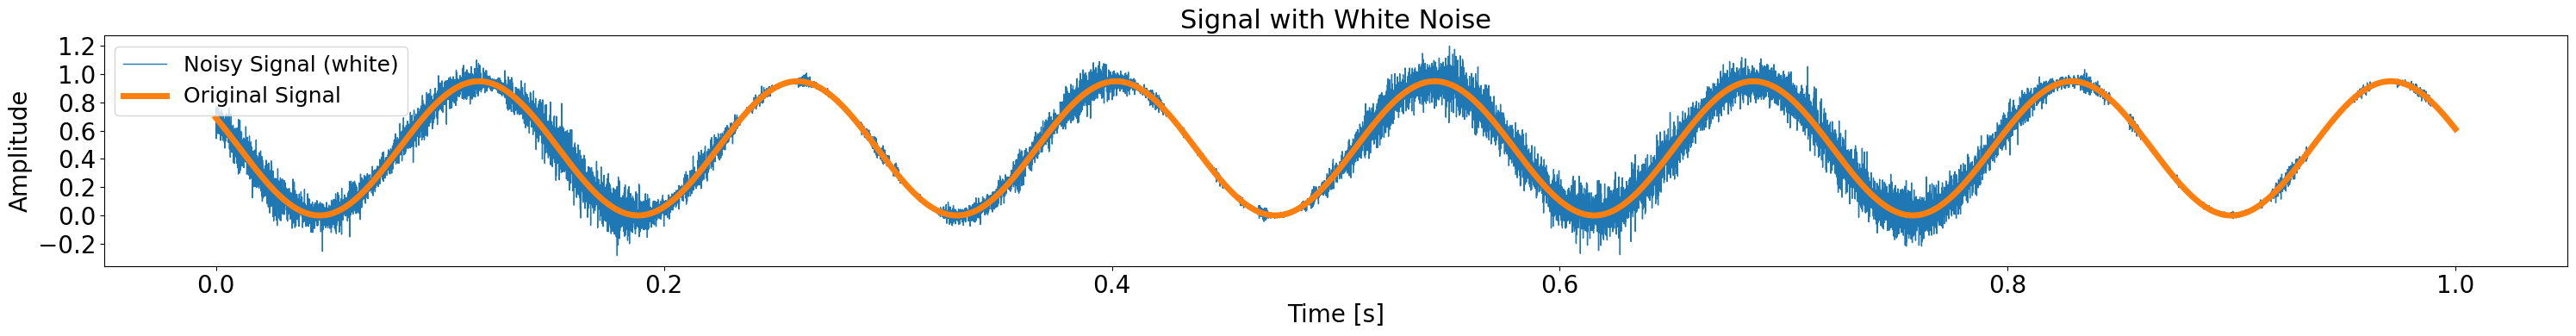

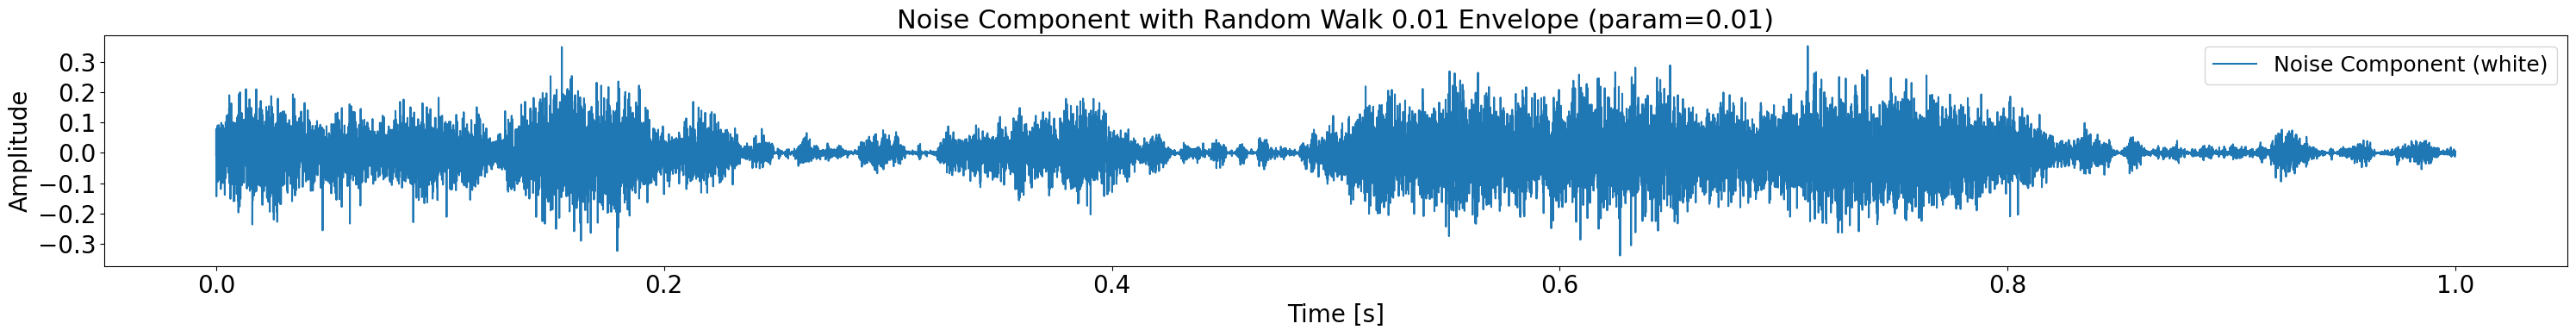

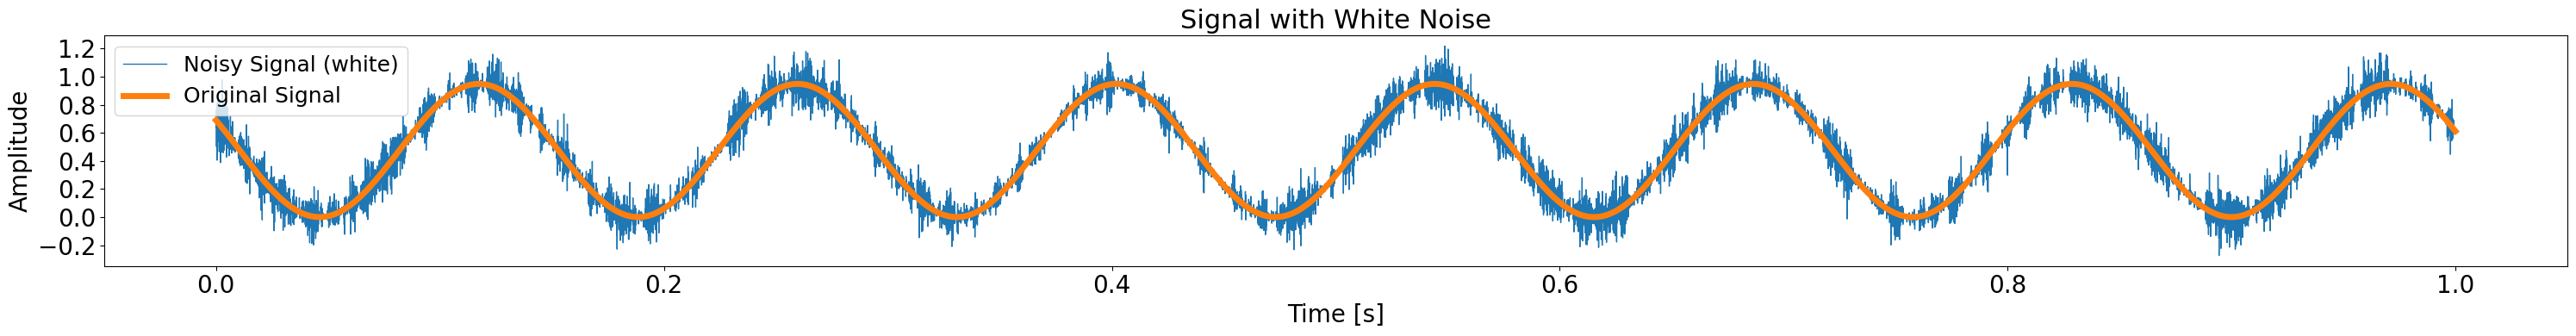

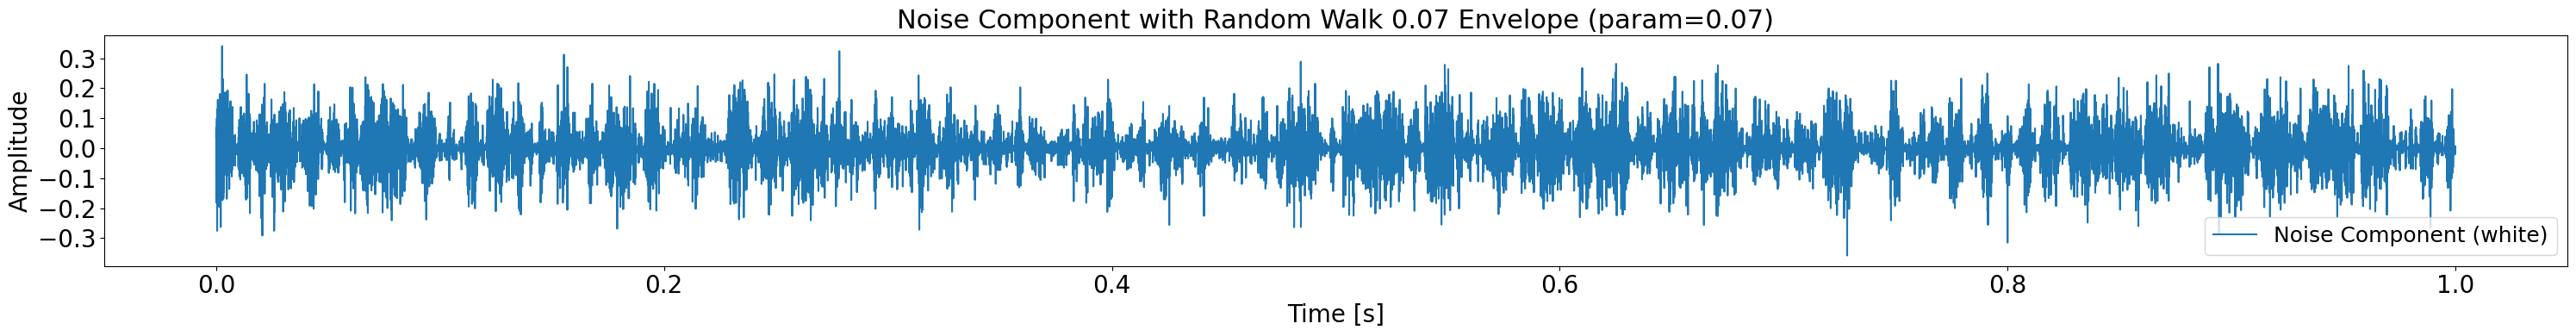

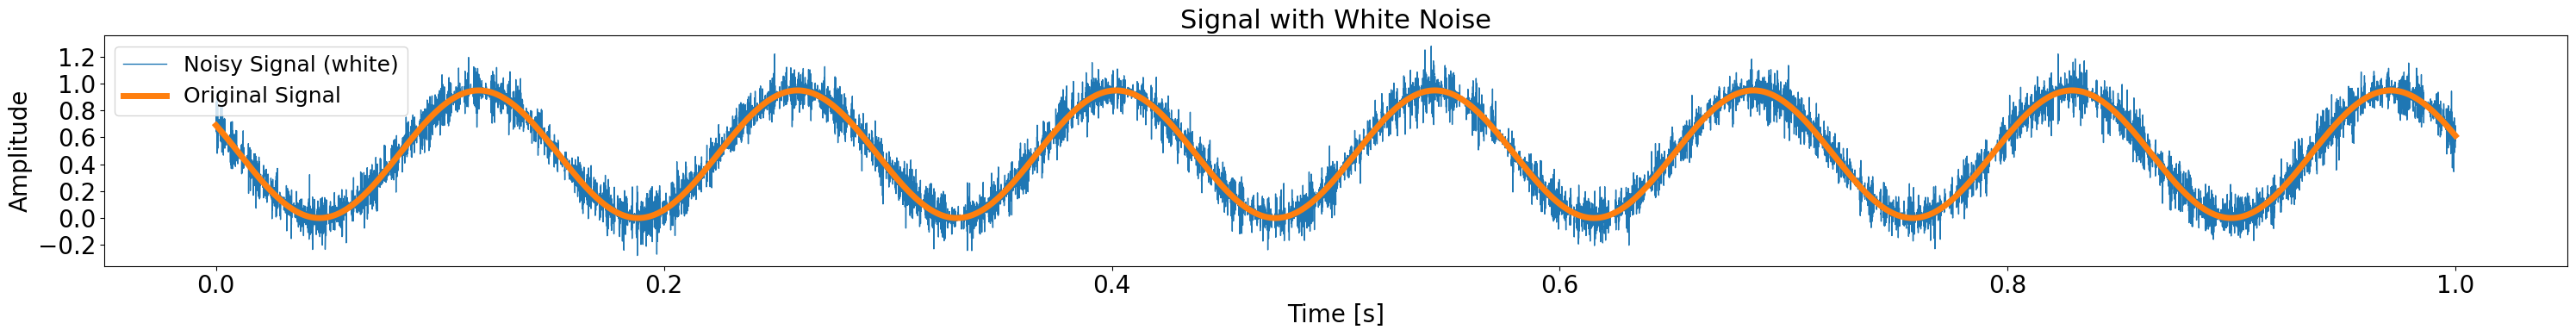

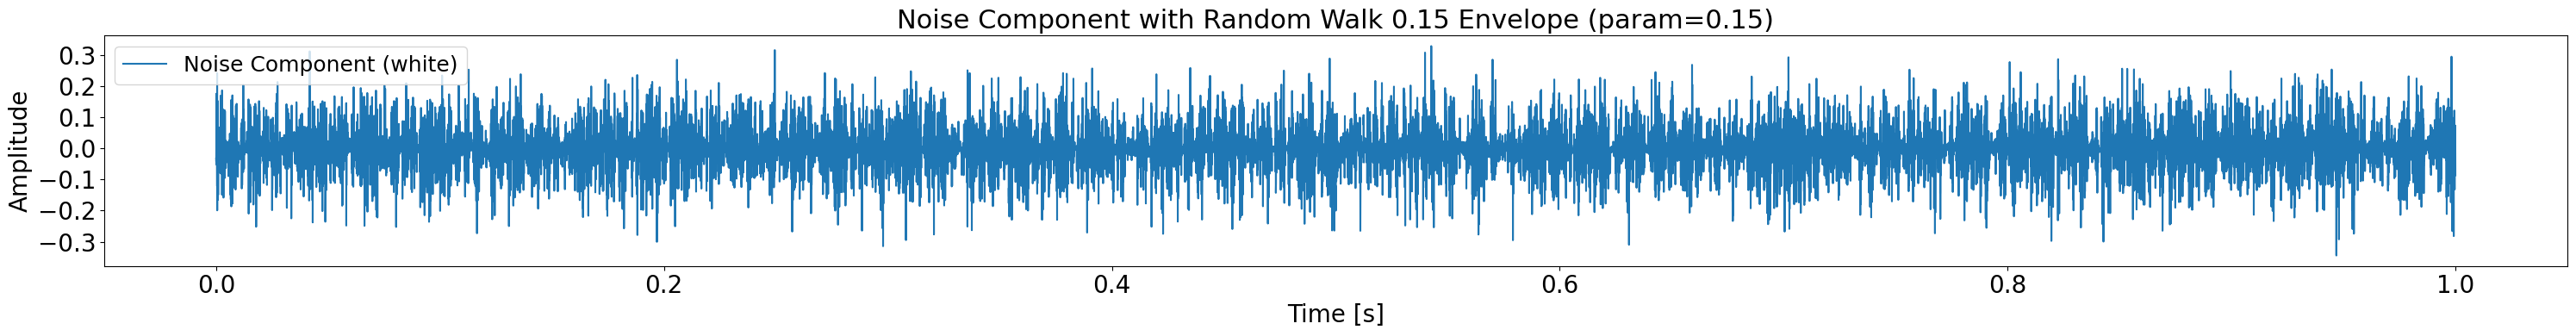

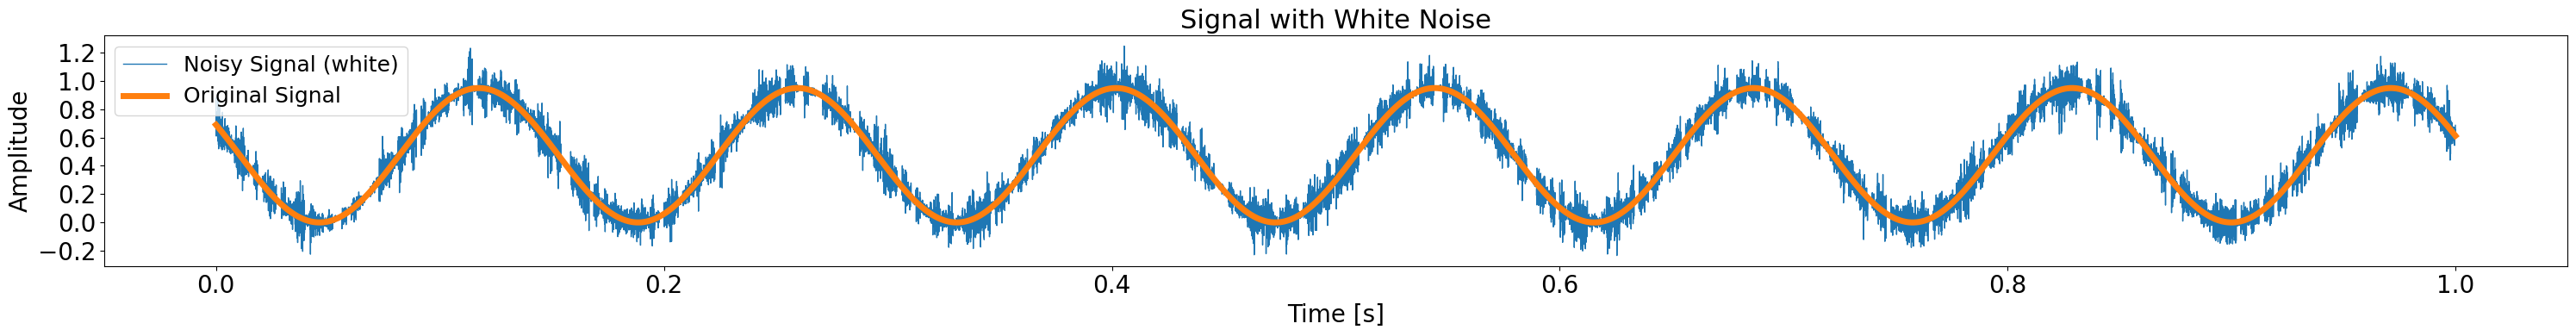

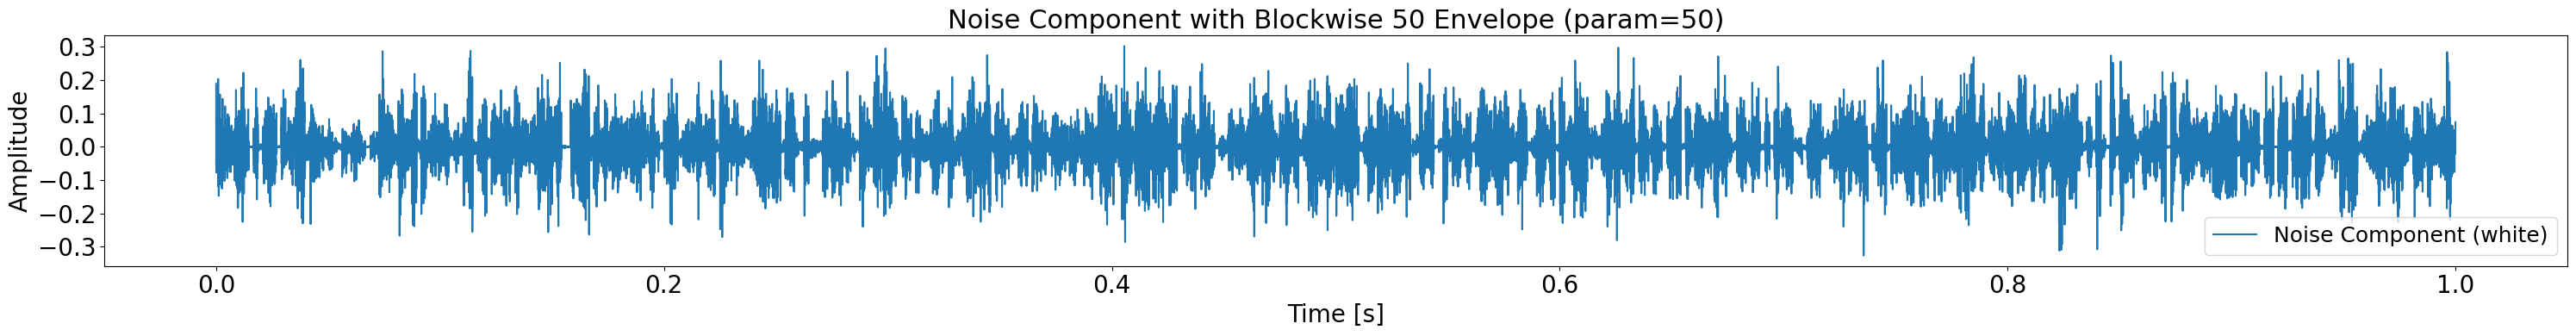

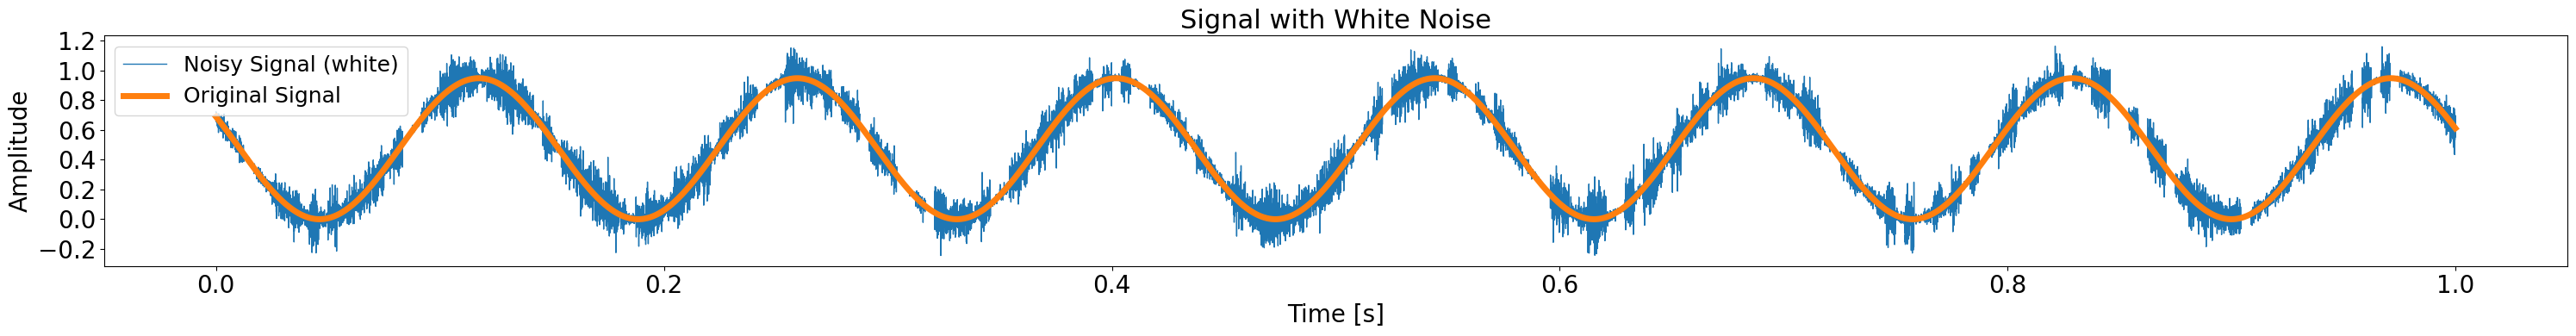

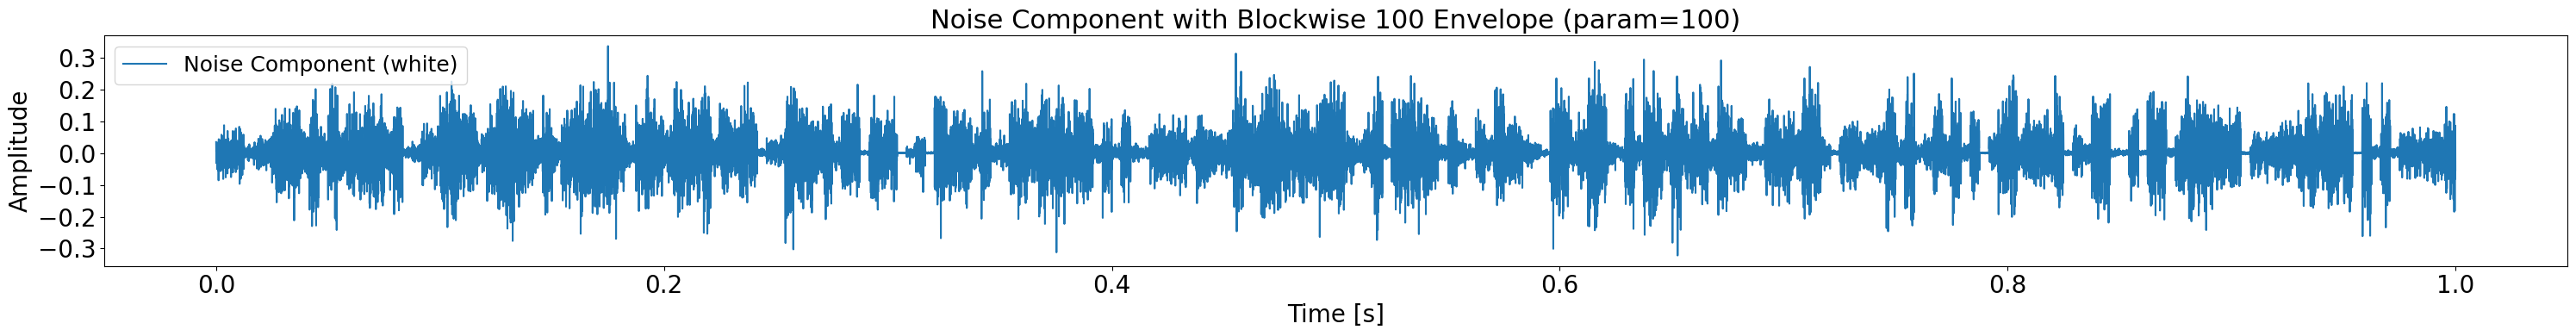

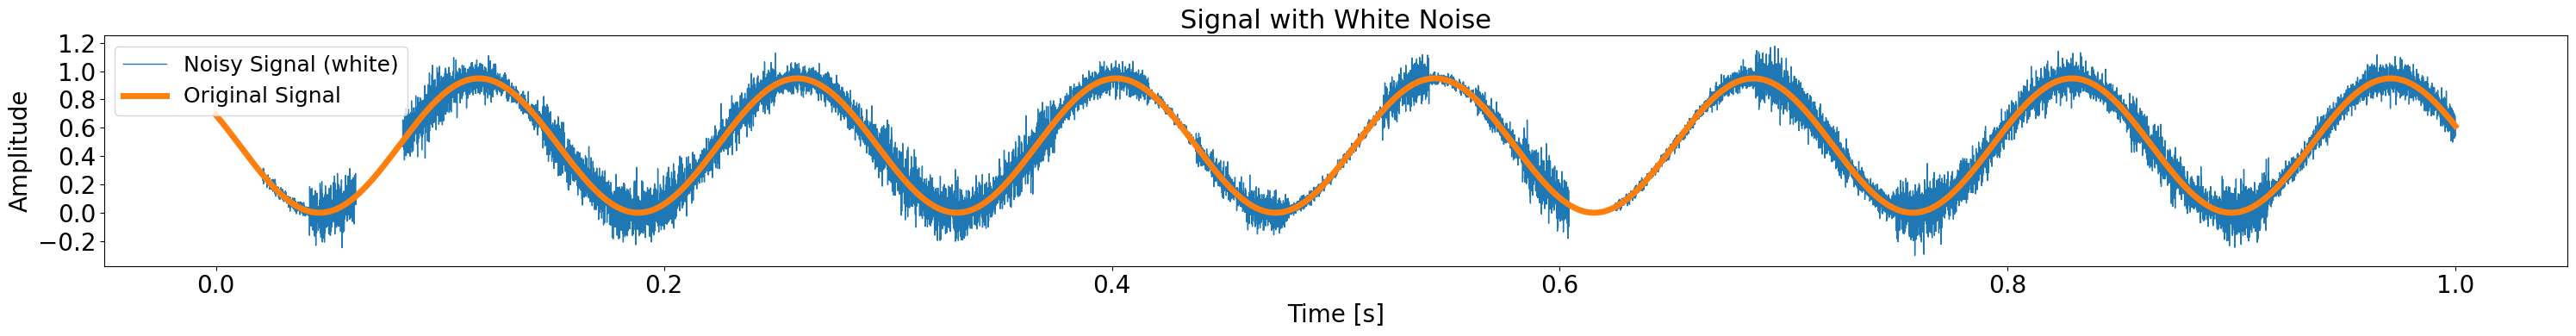

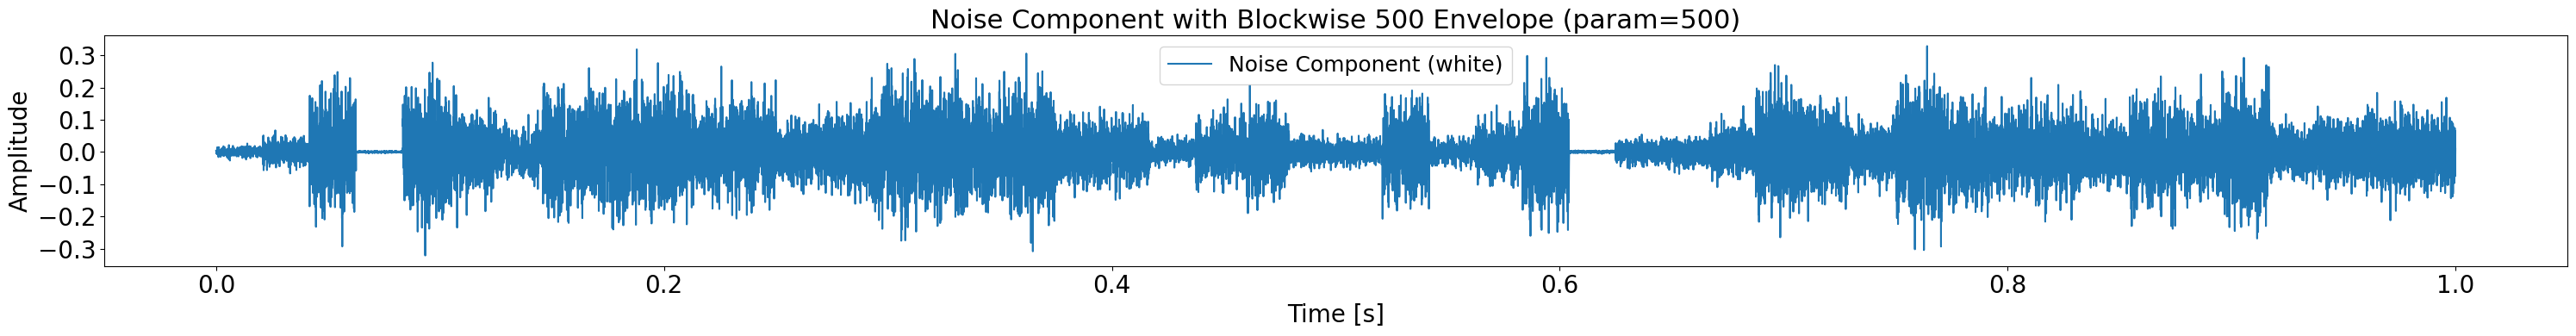

In [9]:
color = 'white'
for env_name, mod_env in mod_envelopes.items():
    # Add pink noise with the current modulation envelope.
    noisy_wave, noise_component = svg.add_colored_noise(
        wave, fs, noise_power, npw=(1, 1), mf=(1, 1), color=color, mod_envelope=mod_env
    )

    # Plot original vs. noisy signal
    plt.figure(figsize=(30, 4))
    plt.plot(t, noisy_wave, label=f"Noisy Signal ({color})", linewidth=1)
    plt.plot(t, wave, label="Original Signal", linewidth=5)
    plt.title(f"Signal with {color.capitalize()} Noise", fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Time [s]", fontsize=20)
    plt.ylabel("Amplitude", fontsize=20)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.show()
    
    # Plot the noise component alone
    plt.figure(figsize=(30, 4))
    plt.plot(t, noise_component, label=f"Noise Component ({color})")
    plt.title(f"Noise Component with {env_name} Envelope (param={mod_env['param'][0]})", fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Time [s]", fontsize=20)
    plt.ylabel("Amplitude", fontsize=20)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.show()

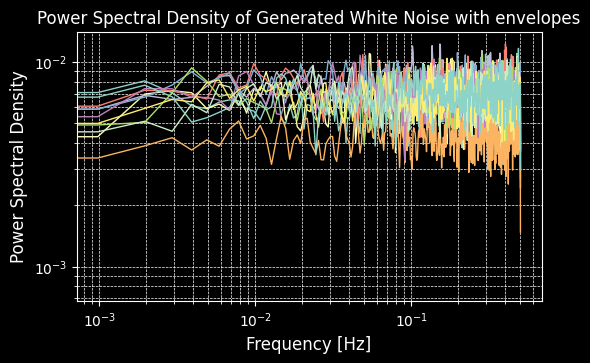

In [11]:
color = 'white'
plt.figure(figsize=(6, 3.5))
plt.style.use("dark_background")
for env_name, mod_env in mod_envelopes.items():
    # Add pink noise with the current modulation envelope.
    noisy_wave, noise_component = svg.add_colored_noise(
        wave, fs, noise_power, npw=(1, 1), mf=(1, 1), color=color, mod_envelope=mod_env
    )
    f, Pxx = welch(noise_component, nperseg=1024)  # Welch’s method for PSD
    plt.loglog(f, Pxx, label=f"{color.capitalize()} Noise PSD", linewidth=1)

plt.title(f"Power Spectral Density of Generated White Noise with envelopes", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Frequency [Hz]", fontsize=12)
plt.ylabel("Power Spectral Density", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
#plt.legend(fontsize=12)
plt.show()

# Passing custom filter

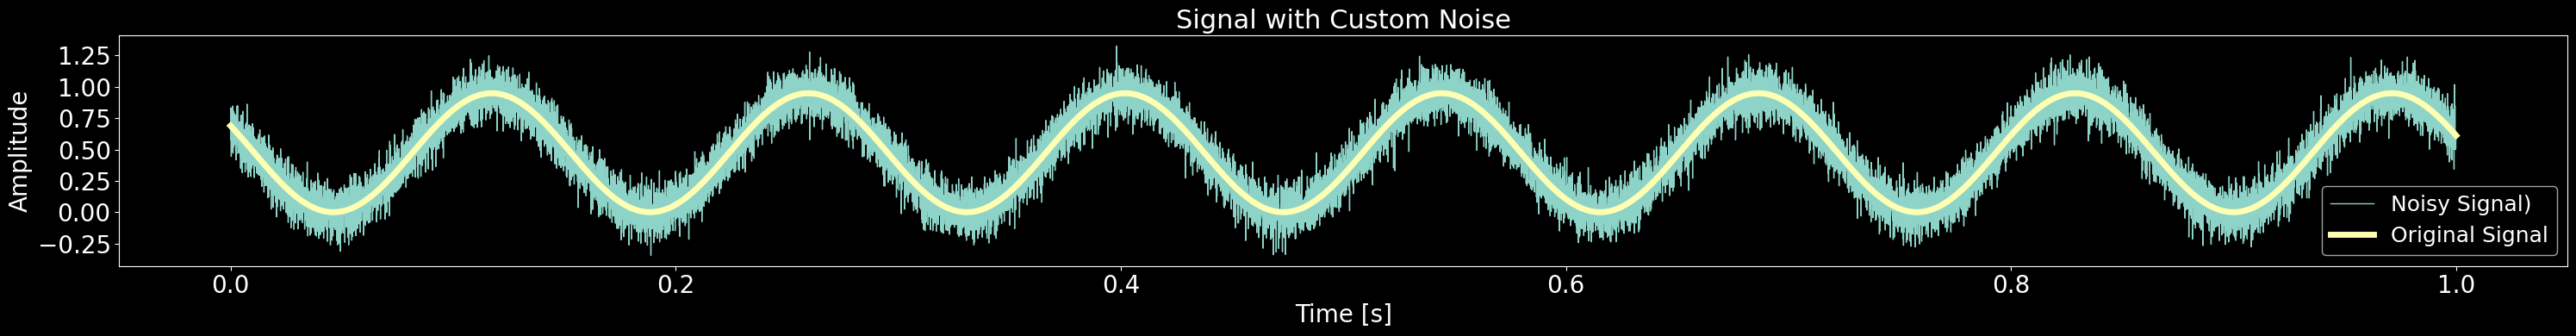

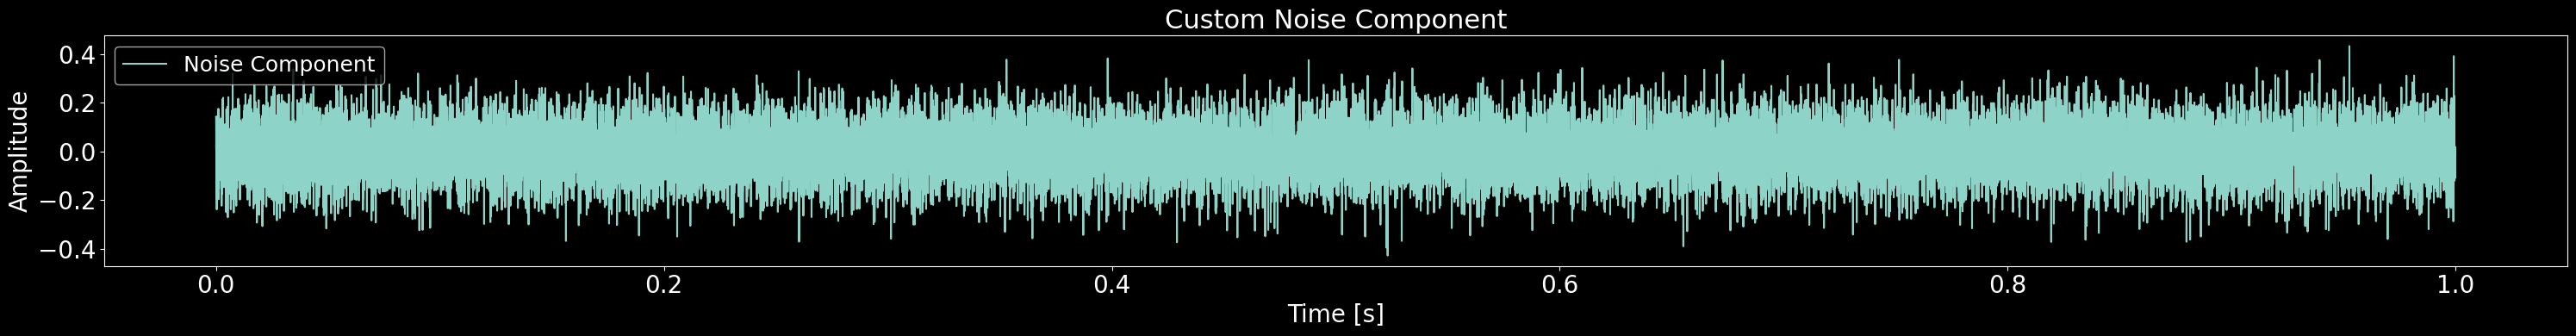

In [15]:
from functools import partial

my_filter = partial(svg.harmonic_peaks, base_freq=300, num_harmonics=35, width=500)

noisy_wave, noise_component = svg.add_colored_noise(
    wave, fs, noise_power, npw=(1, 1), mf=(1, 1), color=my_filter, mod_envelope=None
)

f, Pxx = welch(noise_component, nperseg=500)  # Welch’s method for PSD
#print(color, Pxx)

# Plot original vs. noisy signal
plt.figure(figsize=(30, 4))
plt.plot(t, noisy_wave, label=f"Noisy Signal)", linewidth=1)
plt.plot(t, wave, label="Original Signal", linewidth=5)
plt.title(f"Signal with Custom Noise", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

# Plot the noise component alone
plt.figure(figsize=(30, 4))
plt.plot(t, noise_component, label=f"Noise Component")
plt.title(f"Custom Noise Component", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()